# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**RESPUESTA 1:**

Los datos que podrían ayudar a realizar una predicción podrían ser:
* Ubicación.
* Superficie.
* Número de habitaciones.
* Baños.
* Si cuenta con garaje propio.
* Tener cercanía a (entre otros):
    * Estaciones de Subte.
    * Centros comerciales.
    * Escuelas.

Creo que serían buenos datos basado en experiencias personales al momento de buscar alquilar un departamento (estimando que mayor alquiler implica mayor precio para la venta de la propiedad).

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
class ProperatiDataHandler:
    '''
    Saves the original dataset and keeps a copy to be processed with required filters.
    
    Attributes
    ----------
    original_data: pd.DataFrame
        Contains original data.
    processed_data: pd.DataFrame
        Contains a copy of the original data with required filters applied.
    
    Methods
    -------
    filter_data(**kwargs)
        Resets and applies filters to the original data copy.
    '''
    
    def __init__(self, data):
        self.original_data = data.copy()
        self.processed_data = data.copy()

    def filter_data(self, **filters):
        '''
        Resets and applies filters to the original data copy.
        
        Parameters
        ----------
        filters: dict
            Dictionary with required filters. Keys should be provided as below:
            - reset_data: boolean.
                Resets processed data to original value.
            - fixed_values: dict.
                Each key is the column name and its value should be a list
                of coincidences.
            - columns: string list.
                Columns to keep.
            - drop_invalid: boolean.
                Drops invalid instances.
            - drop_missing: Boolean.
                Drops instances with missing values.
            - "max_" keys: int or float
                Applies a max filters to selected column. To be valid,
                the name of the column must be prefixed with "max_"
            - "min_" keys: int or float
                Applies a min filters to selected column. To be valid,
                the name of the column must be prefixed with "min_"
            
        Examples
        --------
        filters = {
            'reset_data': True,
            'fixed_values': {
                'property_type': ['Departamento', 'PH', 'Casa'],
                'l2': ['Capital Federal']
            },
            'columns': ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'],
            'max_surface_total' : 1000,
            'min_surface_total' : 15,
            'drop_invalid': True,
            'drop_missing': True,
            'max_price' : 4000000
        }
        data_handler.filter_data(**filters)
        '''
        if 'reset_data' in filters and filters['reset_data']:
            self._reset_data()
        if 'fixed_values' in filters:
            self._filter_rows(filters['fixed_values'])
        if 'columns' in filters:
            self._filter_columns(filters['columns'])
        if 'drop_invalid' in filters:
            self._drop_invalid()
        if 'drop_missing' in filters:
            self._drop_missing()
        self._apply_boundaries(**filters)
    
    def _reset_data(self):
        self.processed_data = self.original_data

    def _filter_rows(self, rows):
        for prop in rows:
            mask = self.processed_data[prop].isin(rows[prop])
            self.processed_data = self.processed_data[mask]

    def _filter_columns(self, columns):
        self.processed_data = self.processed_data[columns] 

    def _drop_invalid(self):
        mask = self.processed_data.surface_covered <= self.processed_data.surface_total
        self.processed_data = self.processed_data[mask]
    
    def _drop_missing(self):
        self.processed_data.dropna(inplace=True)
        
    def _apply_boundaries(self, **boundaries):
        self._apply_max_boundaries(**boundaries)
        self._apply_min_boundaries(**boundaries)
    
    def _apply_max_boundaries(self, **boundaries):
        max_boundaries = {prop.replace('max_', ''):boundaries[prop] for prop in boundaries if 'max_' in prop and prop.replace('max_', '') in self.processed_data.columns}
        for prop in max_boundaries:
            max_mask = self.processed_data[prop] <= max_boundaries[prop]
            self.processed_data = self.processed_data[max_mask]
    
    def _apply_min_boundaries(self, **boundaries):
        min_boundaries = {prop.replace('min_', ''):boundaries[prop] for prop in boundaries if 'min_' in prop and prop.replace('min_', '') in self.processed_data.columns}
        for prop in min_boundaries:
            min_mask = self.processed_data[prop] >= min_boundaries[prop]
            self.processed_data = self.processed_data[min_mask]
            
    def calculate_correlation(self, price_only=False):
        '''
        Plots a heatmap with correlations for all numeric variables.
        
        Parameters
        ----------
        price_only: boolean, optional.
            When true, only plots correlation between numeric values
            with the feature price.
        '''
        corr_summary = pd.DataFrame()
        if price_only:
            corr_summary[f'price_all'] = self.processed_data.corr().drop(['price'], axis=1).iloc[-1]
        else:
            corr_summary = self.processed_data.corr()
        sns.heatmap(corr_summary, annot=True)
        plt.show()


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [78]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [79]:
data_handler = ProperatiDataHandler(properati)
nrows, ncols = data_handler.original_data.shape
print(f'El dataset contiene {nrows} filas y {ncols} columnas')
data_handler.original_data.head()

El dataset contiene 146660 filas y 19 columnas


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [80]:
data_handler.original_data.info() # Column names, types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [81]:
missing_values_count = data_handler.original_data.isnull().sum() 
missing_values_indexes = np.arange(1, missing_values_count.size + 1) # Generate list of numeric indexes
missing_values_dict = {
    'column': missing_values_count.index.values,
    'missing': missing_values_count.values
}

missing_values = pd.DataFrame(data=missing_values_dict, index=missing_values_indexes) # Create dataframe with missing values counts
missing_values['percentage'] = np.round(100 * missing_values.missing/nrows, 4) # Calculate percentages

print(missing_values)

             column  missing  percentage
1        start_date        0      0.0000
2          end_date        0      0.0000
3        created_on        0      0.0000
4               lat     9925      6.7674
5               lon     9959      6.7905
6                l1        0      0.0000
7                l2        0      0.0000
8                l3        0      0.0000
9             rooms        0      0.0000
10         bedrooms        0      0.0000
11        bathrooms     5957      4.0618
12    surface_total    20527     13.9963
13  surface_covered    21614     14.7375
14            price        0      0.0000
15         currency        0      0.0000
16            title        0      0.0000
17      description        0      0.0000
18    property_type        0      0.0000
19   operation_type        0      0.0000


In [82]:
# Get columns by variable type
data = data_handler.processed_data.copy()
cols_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 0]
categorical_cols = [feature for feature in data.columns if data[feature].dtype == 'O']
numerical_cols = [feature for feature in data.columns if feature not in categorical_cols]
discrete_cols = [feature for feature in numerical_cols if len(data[feature].unique()) < 30]
continuous_cols = [feature for feature in numerical_cols if feature not in discrete_cols]

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [83]:
unique_properties_count = data_handler.original_data.property_type.value_counts()
properties_indexes = np.arange(1, unique_properties_count.size + 1) # Generate list of numeric indexes
properties_count_dict = { 
    'property_type': unique_properties_count.index.values,
    'property_count': unique_properties_count.values
}

property_types = pd.DataFrame(data=properties_count_dict, index=properties_indexes) # Create dataframe with counts
property_types['percentage'] = np.round(100 * property_types.property_count/nrows, 4) # Calculate percentages

print(property_types)

      property_type  property_count  percentage
1      Departamento          107326     73.1801
2              Casa           21521     14.6741
3                PH           14298      9.7491
4              Lote            1312      0.8946
5           Oficina             658      0.4487
6              Otro             374      0.2550
7   Local comercial             325      0.2216
8     Casa de campo             322      0.2196
9          Depósito             265      0.1807
10          Cochera             259      0.1766


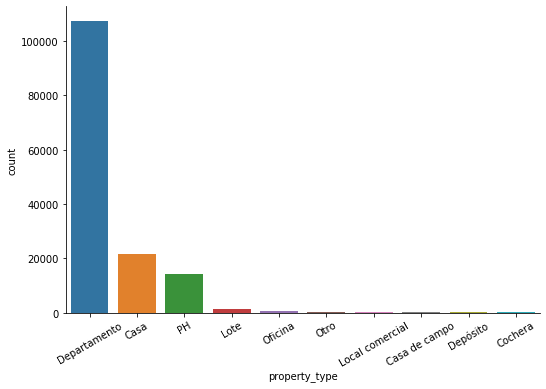

In [84]:
sns.catplot("property_type",
            data=data_handler.original_data,
            order=unique_properties_count.index,
            aspect=1.5,
            kind="count").set_xticklabels(rotation=30)
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

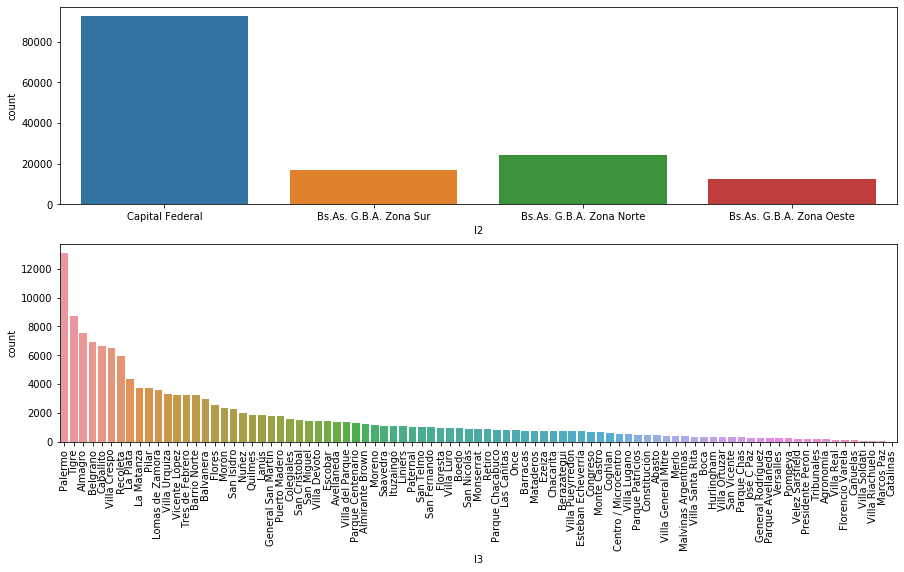

In [85]:
fig, axes = plt.subplots(2, 1, figsize=(15,8))

sns.countplot(data_handler.original_data.l2, ax=axes[0])

l3_order = data_handler.original_data.l3.value_counts().index
sns.countplot(data_handler.original_data.l3, ax=axes[1], order=l3_order)
axes[1].tick_params(axis='x', labelrotation=90)

plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [86]:
filter_rows = {
    'fixed_values': {
        'property_type': ['Departamento', 'PH', 'Casa'],
        'l2': ['Capital Federal']
    }
}

data_handler.filter_data(**filter_rows)
data_handler.processed_data.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [87]:
filter_columns = {
    'columns': ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
}

data_handler.filter_data(**filter_columns)
data_handler.processed_data.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


**Respuesta parte A:** Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?

In [88]:
data_handler.processed_data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [89]:
def plot_numeric_variables(data, selected_columns, continuous=continuous_cols):
    for feature in selected_columns:
        plt.figure(figsize=(12,6))
        plt.subplot(1, 2, 1)
        fig = sns.boxplot(y=data[feature])
        fig.set_title('')
        fig.set_ylabel(feature)

        if feature in continuous:
            plt.subplot(1, 2, 2)
            fig = sns.distplot(data[feature].dropna())
            fig.set_ylabel('Count (density)')
            fig.set_xlabel(feature)

        plt.tight_layout()
        plt.show()

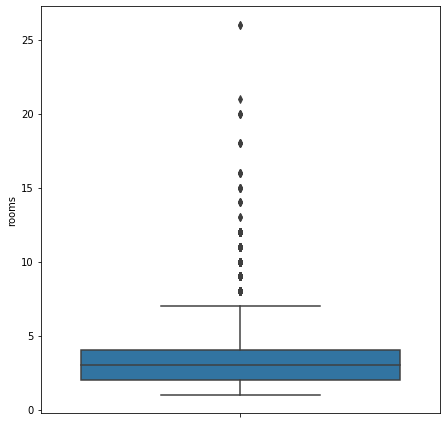

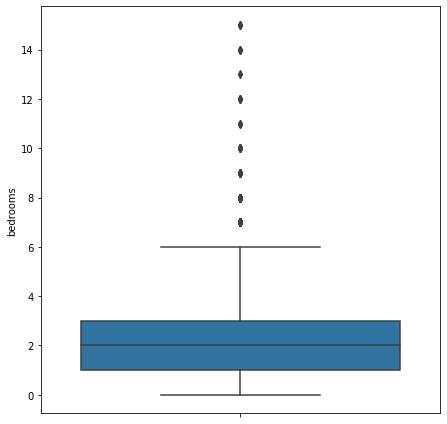

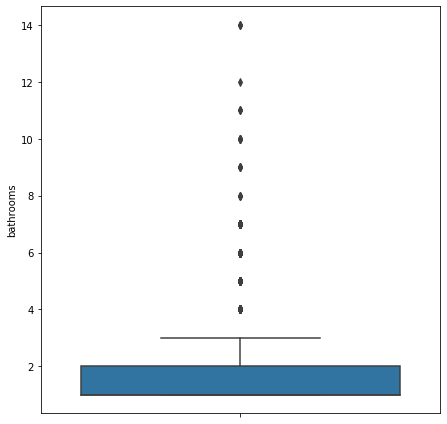

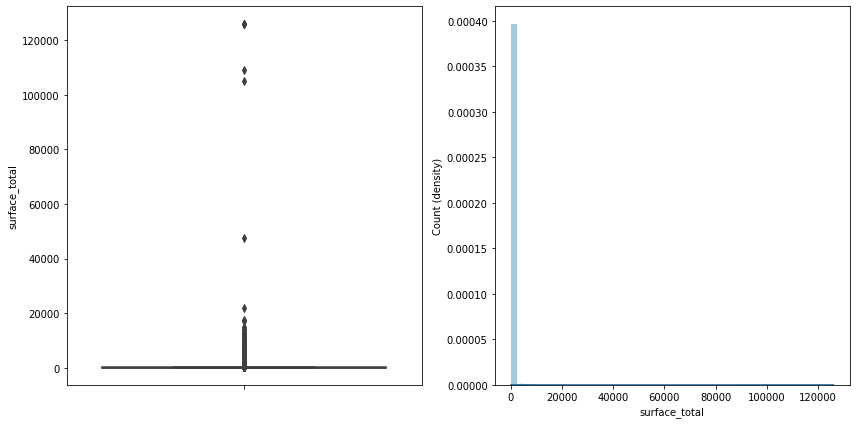

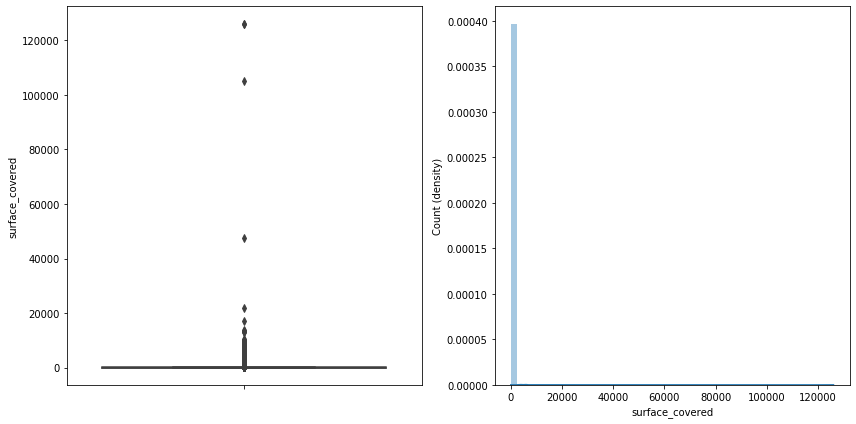

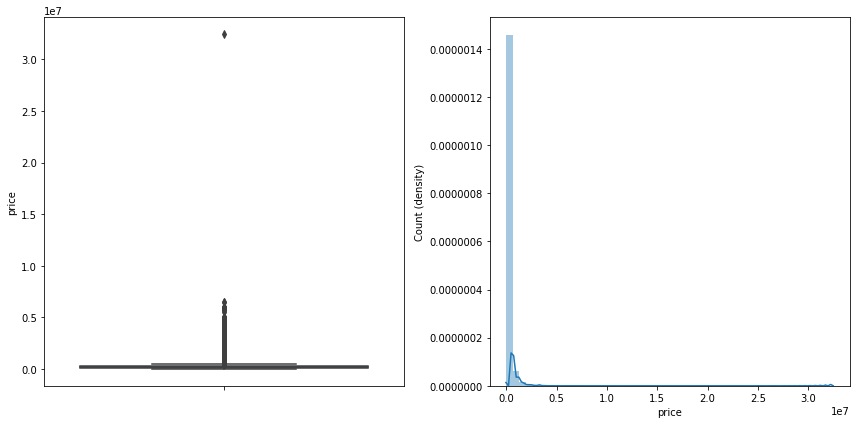

In [90]:
plot_numeric_variables(data=data_handler.processed_data,
                       selected_columns=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'])

**Respuesta parte B**: Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

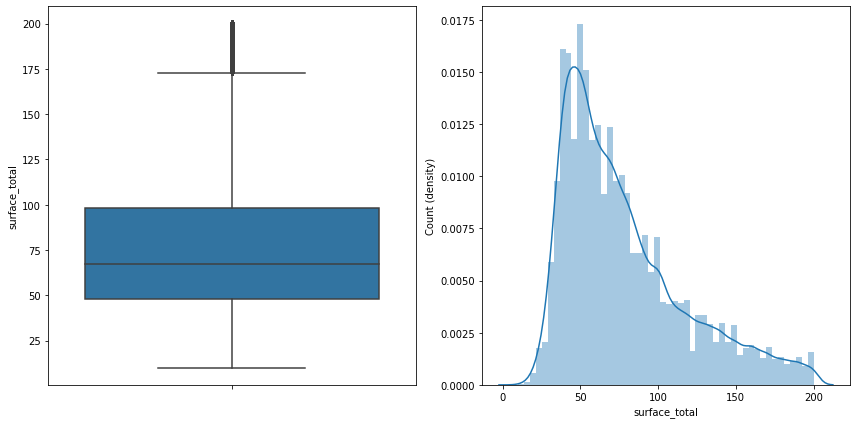

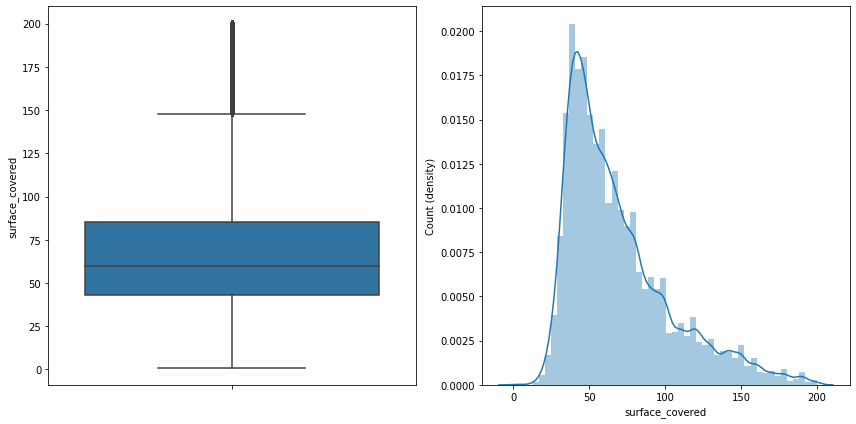

In [91]:
surface_max_threshold = { 'max_surface_total' : 200, 'max_surface_covered': 200 }
data_handler.filter_data(**surface_max_threshold)

plot_numeric_variables(data=data_handler.processed_data, selected_columns=['surface_total', 'surface_covered'])

**Respuesta parte C:** Lo mismo ocurre con valores de superficie total muy chico.

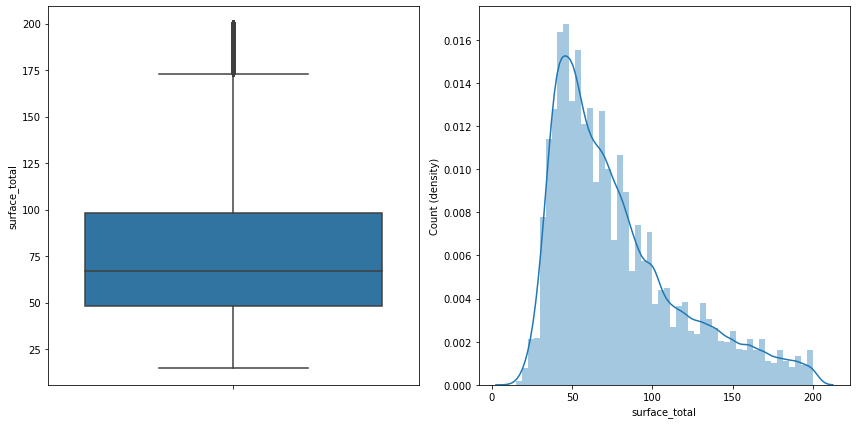

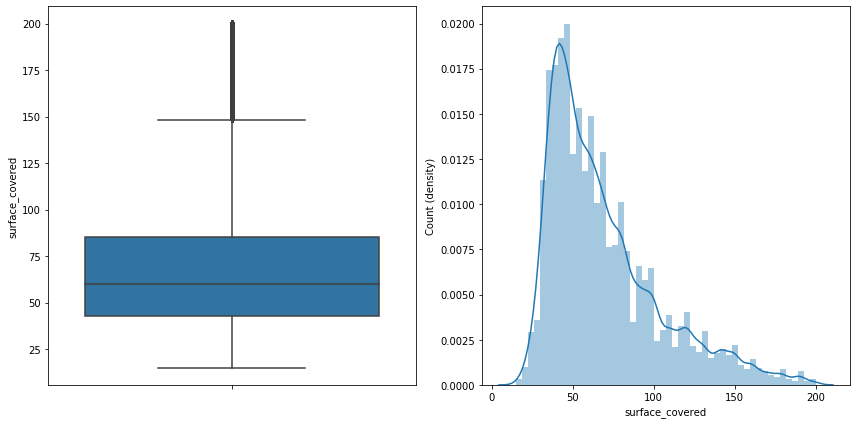

In [92]:
surface_min_threshold = { 'min_surface_total' : 15, 'min_surface_covered': 15 }
data_handler.filter_data(**surface_min_threshold)

plot_numeric_variables(data=data_handler.processed_data, selected_columns=['surface_total', 'surface_covered'])

**Respuesta parte D:** Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.

In [93]:
drop_invalid_instances = { 'drop_invalid': True }
data_handler.filter_data(**drop_invalid_instances)
data_handler.processed_data.shape

(74873, 6)

**Respuesta parte E:** El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

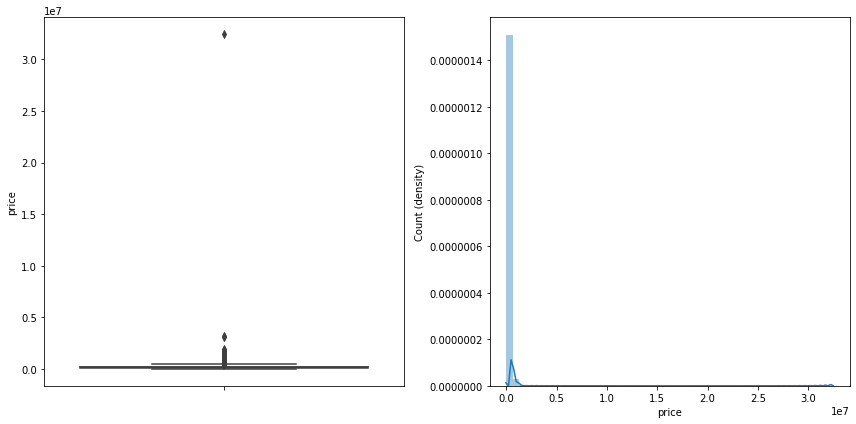

In [94]:
plot_numeric_variables(data=data_handler.processed_data, selected_columns=['price'])

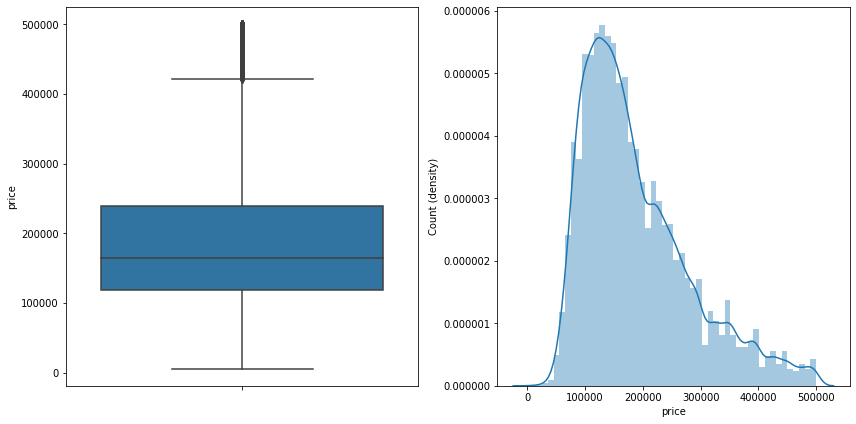

In [95]:
price_max_threshold = { 'max_price' : 500000 }
data_handler.filter_data(**price_max_threshold)

plot_numeric_variables(data=data_handler.processed_data, selected_columns=['price'])

**Respuesta parte F:** Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn.

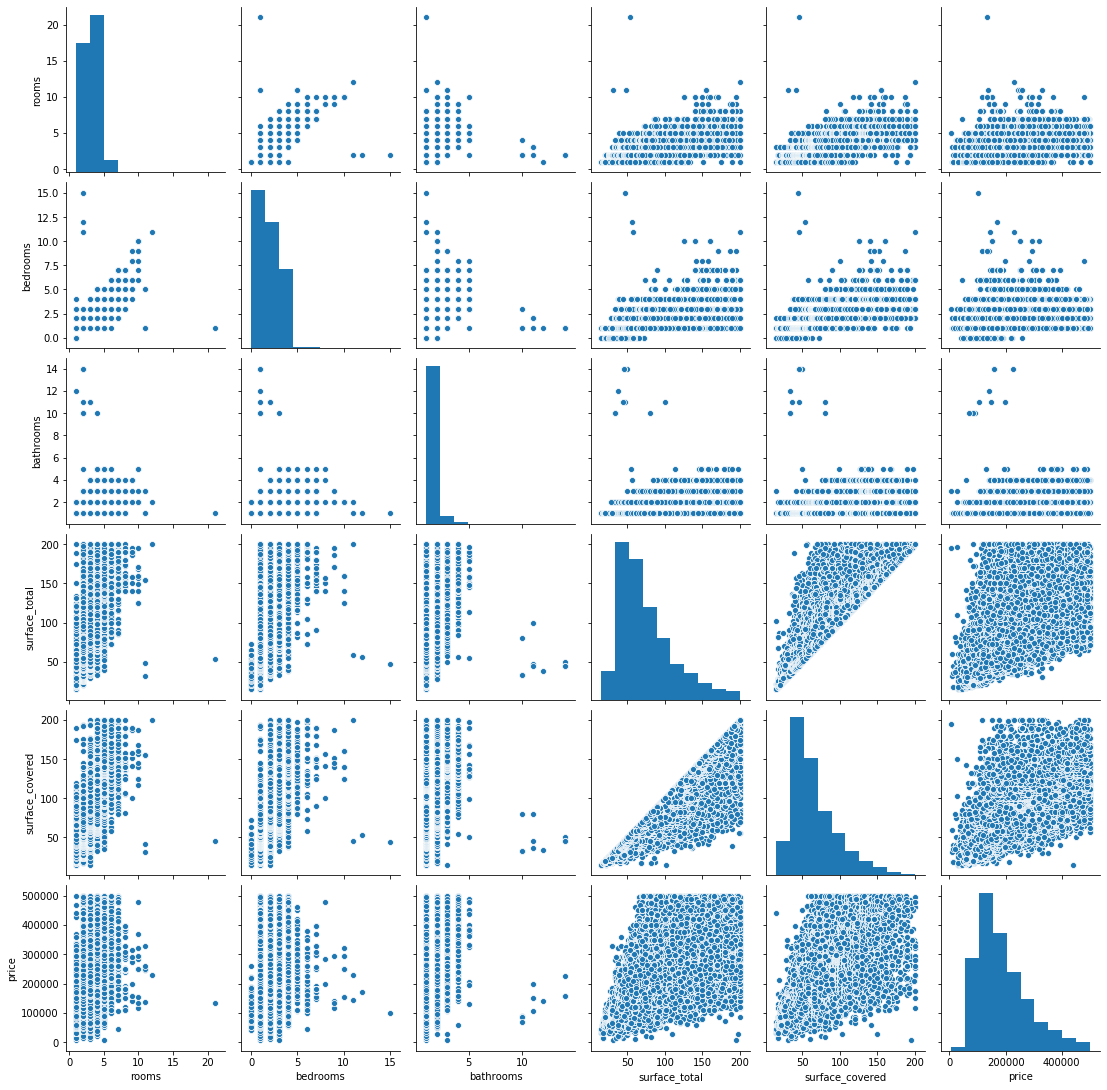

In [96]:
sns.pairplot(data_handler.processed_data)
plt.show()

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

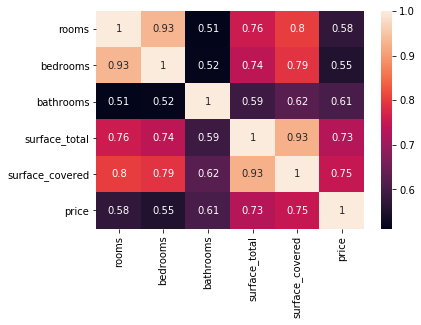

In [97]:
data_handler.calculate_correlation()

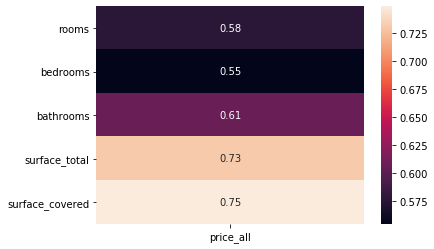

In [98]:
data_handler.calculate_correlation(price_only=True)

Realizando nuevamente el filtrado pero agregando la columna 'property_type'

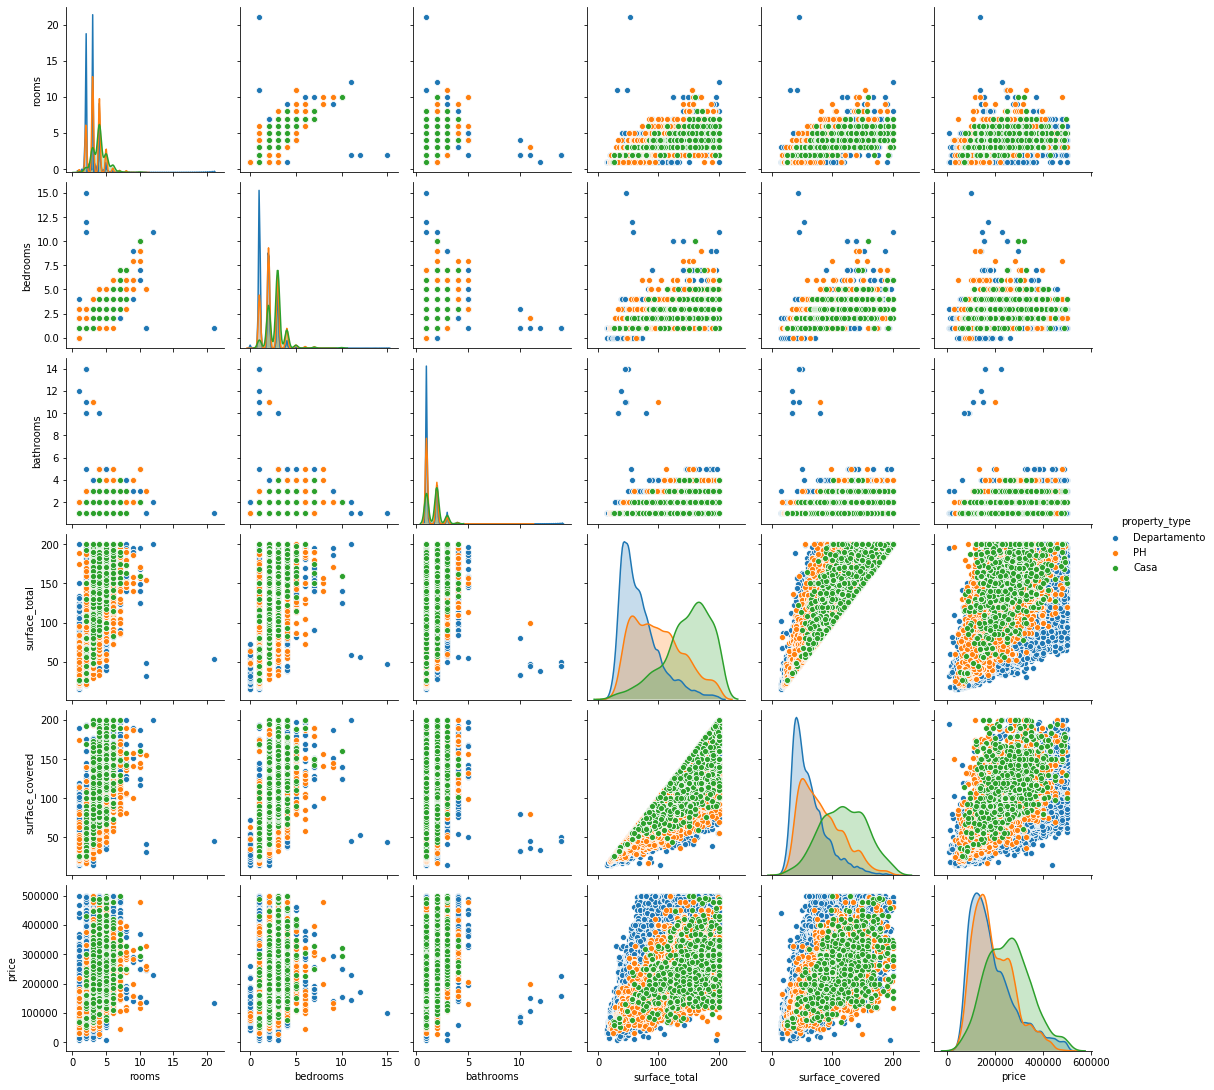

In [99]:
filters = {
    'reset_data': True,
    'columns': ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type'],
    **filter_rows,
    **surface_max_threshold,
    **surface_min_threshold,
    **drop_invalid_instances,
    **price_max_threshold
}
data_handler.filter_data(**filters)
sns.pairplot(data_handler.processed_data, hue="property_type")
plt.show()

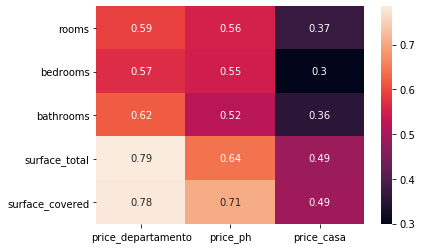

In [100]:
corr_summary = pd.DataFrame()

props = filters['fixed_values']['property_type']
for prop in props:
    mask = data_handler.processed_data.property_type == prop
    corr_dept = data_handler.processed_data[mask].corr().drop(['price'], axis=1).iloc[-1]
    corr_summary[f'price_{prop.lower()}'] = corr_dept

sns.heatmap(corr_summary, annot=True)
plt.show()

### 2.1 Desafío

Se comenzará el desafío con el filtrado hecho en pasos anteriores:

In [101]:
filters = {
    'reset_data': True,
    'columns': ['start_date', 'end_date', 'l3', 'lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type'],
    'fixed_values': {
        'property_type': ['Departamento', 'PH', 'Casa'],
        'l2': ['Capital Federal']
    },
    'max_surface_total' : 200,
    'max_surface_covered': 200,
    'min_surface_total' : 15,
    'min_surface_covered': 15,
    'drop_invalid': True,
    'max_price' : 500000
}
data_handler.filter_data(**filters)
desafio = data_handler.processed_data.copy()

En el siguiente gráfico podemos visualizar loa precios medios de los inmuebles para cada barrio de menor a mayor.

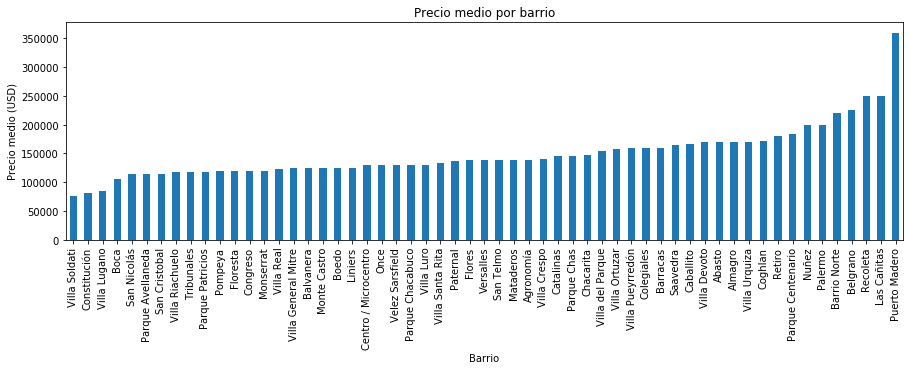

In [102]:
desafio.copy().groupby('l3').price.median().sort_values(0).plot.bar(figsize=(15,4))
plt.xlabel('Barrio')
plt.ylabel('Precio medio (USD)')
plt.title('Precio medio por barrio')
plt.show()

Se estudiará cómo se esparce geográficamente los tipos de propiedades:

In [103]:
print(f'Valores de longitud: {desafio.lon.min():.2f} min, {desafio.lon.max():.2f} max')
print(f'Valores de latitud: {desafio.lat.min():.2f} min, {desafio.lat.max():.2f} max')

Valores de longitud: -58.53 min, -58.35 max
Valores de latitud: -34.70 min, -34.54 max


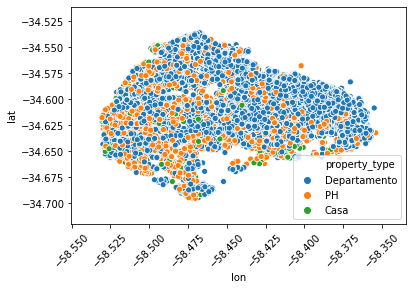

In [104]:
sns.scatterplot(x="lon", y="lat", hue="property_type", data=desafio)
plt.xticks(rotation=45)
plt.show()

Separamos el gráfico para ver con un poco más a detalle las distribuciones geográficas por propiedad:

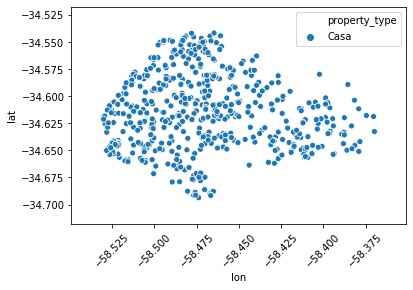

In [105]:
sns.scatterplot(x="lon", y="lat", hue="property_type", data=desafio[desafio.property_type == 'Casa'])
plt.xticks(rotation=45)
plt.show()

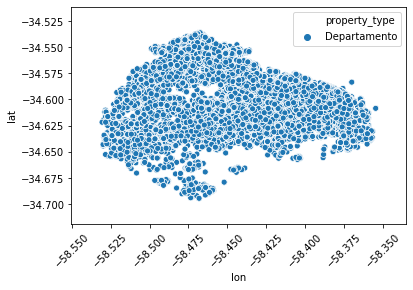

In [106]:
sns.scatterplot(x="lon", y="lat", hue="property_type", data=desafio[desafio.property_type == 'Departamento'])
plt.xticks(rotation=45)
plt.show()

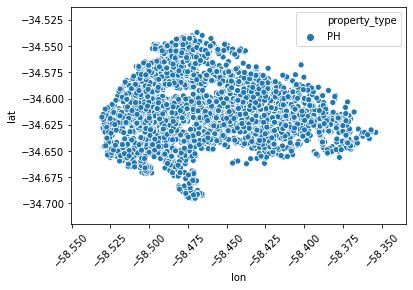

In [107]:
sns.scatterplot(x="lon", y="lat", hue="property_type", data=desafio[desafio.property_type == 'PH'])
plt.xticks(rotation=45)
plt.show()

Podemos ver que:
* En la zona noreste predominan los departamentos.
* La zona centro-sur no posee muchos datos disponibles. Esto puede deberse, entre otras cosas:
    * No se tomaron datos en esa zona.
    * Contiene zonas industriales o comerciales únicamente.
    * Contiene zonas públicas como parques.
* Las casas son las que presentan menos concentración.

Lo anteriormente expuesto, puede deberse mayormente a que la cantidad de departamentos publicados es mucho mayor que de PH y casas. No se tienen suficientes pruebas para asegurar que el compartamiento de la muestra es el mismo que el de la población.

Ahora bien, ya que se tienen los datos de inicio y fin de publicación, podemos analizar en cuáles barrios las publicaciones duraron más tiempo en línea. Lamentablemente no se puede estimar el tiempo de venta de las propiedades ya que no se cuenta con información sobre el motivo por el cuál la publicación se dio de baja (se hizo la venta, el vendedor cambio de decisión, etc). Si se llegase a contar con esos datos adicionales, el mismo análisis puede ser aplicado para obtener los resultados deseados.

Se verán, en primer lugar, los valores de las fechas:

In [108]:
get_year = lambda value: value[:4]
desafio.end_date.copy().apply(get_year).unique()

array(['2019', '9999', '2020'], dtype=object)

In [109]:
desafio.start_date.copy().apply(get_year).unique()

array(['2019', '2020'], dtype=object)

Vemos que existen registros de los años 2019, 2020 y 9999.
Es posible que los registros de 9999 se deban, entre otras posibilidades, que las publicaciones esten activas aún y el sistema los guarde en bases de datos con ese valor. Se evaluará a continuación la cantidad y se removerán para el análisis.

In [110]:
invalid_date_mask = desafio.end_date.copy().apply(get_year).isin(['9999'])
print(f'Se tienen {invalid_date_mask.sum()} ({100 * invalid_date_mask.mean():.2f}%) registros con fechas invalidas')
desafio = desafio[~invalid_date_mask]

Se tienen 3859 (5.40%) registros con fechas invalidas


Se convertirán las columnas de `start_date` y `end_date` en DateTime para poder realizar la resta de los valores y obtener el número de días que la publicación estuvo en línea. Esta resta estará en nanosegundos por lo que habría que dividir por un factor de conversión para obtener la medida en días.

In [111]:
days_to_nano_seconds = 8.64e13
desafio['start_date'] = pd.to_datetime(desafio['start_date'], format='%Y-%m-%d')
desafio['end_date'] = pd.to_datetime(desafio['end_date'], format='%Y-%m-%d')
desafio['elapsed_time'] = (desafio['end_date'] - desafio['start_date']).astype(int) // days_to_nano_seconds

required_columns = ['price', 'elapsed_time', 'l3']
desafio = desafio[required_columns]
desafio.head()

,price,elapsed_time,l3
0,153000.0,67,San Cristobal
1,159000.0,35,Boedo
2,125000.0,15,Palermo
3,295000.0,67,Palermo
5,150000.0,15,Villa Crespo


Se verán los valores de la media de tiempo por barrio:

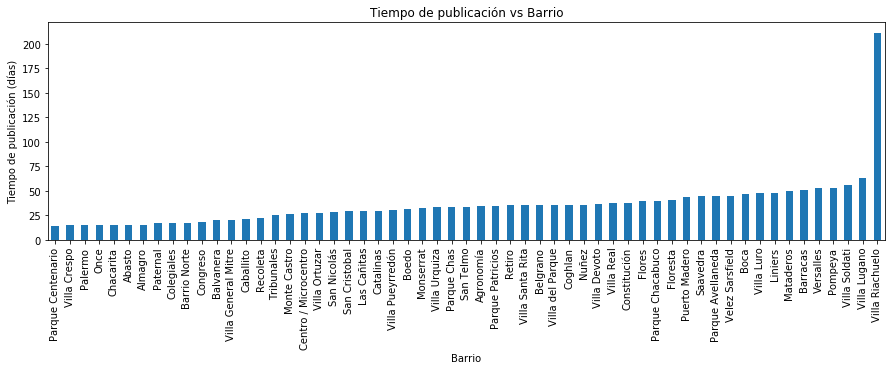

In [112]:
desafio.copy().groupby('l3').elapsed_time.median().sort_values(0).plot.bar(figsize=(15,4))
plt.xlabel('Barrio')
plt.ylabel(f'Tiempo de publicación (días)')
plt.title('Tiempo de publicación vs Barrio')
plt.show()

Se puede visualizar que las zonas de Parque Centenario, Villa Crespo, Palermo y Once, son zonas donde las publicaciones permanecen menos tiempo en línea y, por el contrario, Villa Soldati, Villa Lugano y Villa Riachuelo tienen mayor tiempo de publicación.

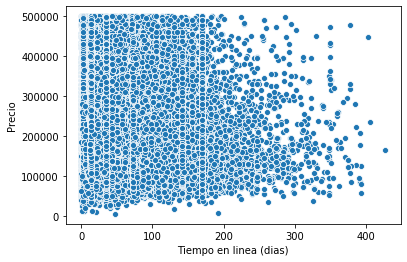

In [113]:
sns.scatterplot(desafio.elapsed_time, desafio.price)
plt.xlabel('Tiempo en linea (dias)')
plt.ylabel(f'Precio')
plt.show()

No se podría asegurar la existencia de un patrón definido, sin embargo, se puede observar que en esta muestra, los inmuebles que tuvieron su publicación más tiempo en línea fueron, en gran medida, aquellos con precios bajos.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

In [114]:
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

class MachineLearningProcess:
    '''
    Helper to standardize the Machine Learning model study.
    '''
    def __init__(self, test_size=0.2, random_state=42):
        self.test_size=test_size
        self.random_state=random_state
        self.models_errors = {}
        self.benchmark=None
        self.best_hyperparams = {}
        
    def study_dataset(self, X, y, models_info, metric='rmse', plot_residuals=False, kde=True, plot_error_metrics=False):
        '''
        Executes the study for specified models.
        '''
        self.models_info = models_info
        self._train_test_split(X, y)
        self._get_models_results(plot_residuals=plot_residuals, metric=metric, kde=kde)
        
        if plot_error_metrics:
            self._plot_error_metrics()
    
    def _train_test_split(self, X, y):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
    
    def _get_models_results(self, metric, plot_residuals, kde):
        for model_name in self.models_info:

            # Select model
            print(f'Modelo: {model_name}')
            model = self.models_info[model_name]

            # Train model
            model.fit(self.X_train, self.y_train)

            # Predict results
            y_train_pred = model.predict(self.X_train)
            y_test_pred = model.predict(self.X_test)

            # Calculate errors
            model_errors = self._calculate_model_errors(y_train_pred, y_test_pred, metric=metric)
            self.models_errors[model_name] = model_errors

            # Plot results if required
            if plot_residuals:
                self._plot_model_errors(y_train_pred, y_test_pred, kde)
            
            # If linear model, save coefficients
            if isinstance(model, LinearRegression):
                self._save_linear_model_coef(model.coef_)
            
            # If DT model, save feature importances
            if isinstance(model, DecisionTreeRegressor):
                self._save_dt_model_feature_importances(model.feature_importances_)

        self._convert_errors_to_dataframe(metric=metric)
    
    def _calculate_model_errors(self, y_train_pred, y_test_pred, metric):
        # Set values
        train_error = np.inf
        test_error = np.inf
        metric_name = 'Error'
        
        # Calculate errors according to selected metric
        if metric == 'rmse':
            train_error = np.sqrt(mean_squared_error(self.y_train, y_train_pred))
            test_error = np.sqrt(mean_squared_error(self.y_test, y_test_pred))
            metric_name = 'Raíz del error cuadrático medio'
        elif metric == 'mae':
            train_error = median_absolute_error(self.y_train, y_train_pred)
            test_error = median_absolute_error(self.y_test, y_test_pred)
            metric_name = 'Error absoluto medio'

        # Print calculated values
        print(f'{metric_name} en Train: {train_error}')
        print(f'{metric_name} en Test: {test_error}\n')
        return [train_error, test_error]
    
    def _plot_model_errors(self, y_train_pred, y_test_pred, kde):
        # Prepare subplots
        plt.figure(figsize = (13,5))

        # Plot error distribution
        plt.subplot(1,2,1)
        sns.distplot(self.y_train - y_train_pred, bins = 20, kde=kde, label = 'train')
        sns.distplot(self.y_test - y_test_pred, bins = 20, kde=kde, label = 'test')
        plt.xlabel('errores')
        plt.legend()

        # Plot real vs predictions values in test set
        ax = plt.subplot(1,2,2)
        ax.scatter(self.y_test,y_test_pred, s =2)

        lims_min = np.min([ax.get_xlim(), ax.get_ylim()])
        lims_max = np.max([ax.get_xlim(), ax.get_ylim()])
        lims = [lims_min, lims_max]

        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')

        # Show plots
        plt.tight_layout()
        plt.show()
    
    def _convert_errors_to_dataframe(self, metric):
        indexes = [f'{metric}_train (USD)', f'{metric}_test (USD)']
        self.models_errors_dataframe = pd.DataFrame(self.models_errors, index=indexes)
    
    def _plot_error_metrics(self):
        ax = self.models_errors_dataframe.transpose().plot.bar(rot=0, figsize=(10,5))
        ax.legend(loc='lower right')
        if self.benchmark is not None:
            for error_value in self.benchmark.to_dict():
                color = 'r' if 'train' in error_value else 'g'
                plt.axhline(y=self.benchmark[error_value],linewidth=1, color=color, label=error_value)
                handles, _ = ax.get_legend_handles_labels()
                plt.legend(handles = handles)
        plt.show()
        
    def _save_linear_model_coef(self, linear_coef):
        self.linear_coef = pd.DataFrame({
            'predictors': self.X_train.columns,
            'coefficients': linear_coef
        })
    
    def _save_dt_model_feature_importances(self, dt_feature_importances):
        self.dt_feature_importances = pd.DataFrame({
            'predictors': self.X_train.columns,
            'feature_importances': dt_feature_importances
        })
        
    def set_benchmark(self, model_name):
        '''
        Selects model as a benchmark. It helps to show the horizontal lines
        in model error comparison plots.
        '''
        self.benchmark = self.models_errors_dataframe.copy()[model_name]
        benchmark_names = [f'benchmark_{name}' for name in self.benchmark.index.copy().values]
        self.benchmark.index = benchmark_names
        print(self.benchmark)

Se generá una instancia de la clase que ayudará a facilitar las pruebas de los modelos:

In [115]:
ml_process = MachineLearningProcess()

In [116]:
filters = {
    'reset_data': True,
    'fixed_values': {
        'property_type': ['Departamento', 'PH', 'Casa'],
        'l2': ['Capital Federal']
    },
    'columns': ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'],
    'max_surface_total' : 1000,
    'min_surface_total' : 15,
    'drop_missing': True,
    'max_price' : 4000000
}
data_handler.filter_data(**filters)
data_handler.processed_data.shape

(81019, 6)

En el filtrado se incluirá también una condición para eliminar las instancias inválidas mencionadas previamente en el proyecto:

In [117]:
filters = { 'drop_invalid': True }
data_handler.filter_data(**filters)
data_handler.processed_data.shape

(80276, 6)

In [118]:
dataset = data_handler.processed_data.copy()
X = dataset.drop(['price'], axis=1)
y = dataset.price

### Selección de la métrica
Como métrica se usará el RMSE, como punto de partida, dado que es uno de los más comunes para problemas de regresión.

### Selección del Benchmark
Para crear un modelo sencillo que sirva como punto de referencia para el estudio, se usará un árbol de decisión con profundidad 5 y una sola propiedad `surface_total` (basado en la idea que el precio depende mayormente de la superficie del inmueble).

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 182228.30885496133
Raíz del error cuadrático medio en Test: 191353.77274650199



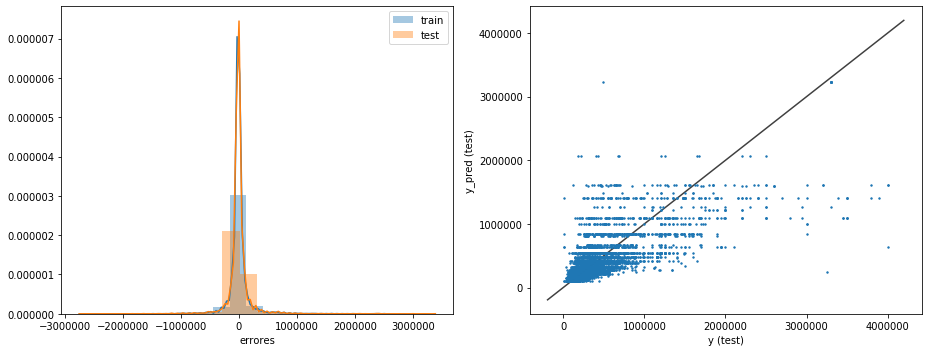

In [119]:
X_benchmark = X[['surface_covered']]
models_info = { 'Árbol de Decisión': DecisionTreeRegressor(max_depth=5, random_state=42) }

ml_process.study_dataset(X_benchmark, y, models_info, metric='rmse', plot_residuals=True, plot_error_metrics=False)

Se puede notar lo siguiente:
* El error obtenido es mayor que el valor del inmueble promedio del conjunto de datos (180.000USD).
* En la distribución de errores, se puede observar que las escalas en el eje de abscisas existen valores cercanos a los 2.000.000USD.
* El gráfico de valores reales vs predicciones muestra que muchas de las mayores diferencias se encuentran en inmuebles con un precio mayor a 2.000.000USD.

In [120]:
print(f'Precio medio de las propiedades a estudiar: {y.median()} USD')

Precio medio de las propiedades a estudiar: 180000.0 USD


Para efectos de comparaciones posteriores en los gráficos de los errores, guardamos el resultado del benchmark.

In [121]:
ml_process.set_benchmark('Árbol de Decisión')

benchmark_rmse_train (USD)    182228.308855
benchmark_rmse_test (USD)     191353.772747
Name: Árbol de Decisión, dtype: float64


Dado que el dataset ha mostrado contener una cantidad importante de valores atípicos, se estudiara cómo el resultado del error varía con una métrica que no se vea afectada por valores extremos como lo es "error absoluto medio" (MAE).

In [122]:
ml_process.study_dataset(X_benchmark, y, models_info, metric='mae', plot_residuals=False, plot_error_metrics=False)

Modelo: Árbol de Decisión
Error absoluto medio en Train: 38449.57541776606
Error absoluto medio en Test: 38449.57541776606



Se puede evidenciar una diferenia significativa entre los valores de errores. Esto puede ser resultado de un comportamiento diferente que rige los precios de los valores atípicos. Sin embargo, para descartar que no es un efecto del sub-ajuste del modelo, se continuará usando la métrica del RMSE.

### Entrenando vecinos más cercanos y árboles de decisión (se incluirá la regresión lineal)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 182824.05074306316
Raíz del error cuadrático medio en Test: 187069.30574803575

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 163632.46634279407
Raíz del error cuadrático medio en Test: 173193.86676715378

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 119354.64268877037
Raíz del error cuadrático medio en Test: 150236.04902117178



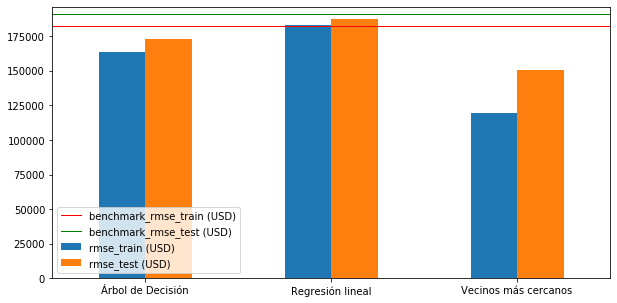

In [123]:
models_info = {
    'Regresión lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Vecinos más cercanos': KNeighborsRegressor()
}

ml_process.study_dataset(X, y, models_info, metric='rmse', plot_residuals=False, plot_error_metrics=True)

Usando los predictores seleccionados, se visualiza una mejora en el desempeño de los modelos en general. Dado que el modelo de vecinos más cercanos tiene una forma que puede indicar sobre-ajuste, se tomará el árbol de decisión como nuevo benchmark.

In [124]:
ml_process.set_benchmark('Árbol de Decisión')

benchmark_rmse_train (USD)    163632.466343
benchmark_rmse_test (USD)     173193.866767
Name: Árbol de Decisión, dtype: float64


Se graficarán las curvas de aprendizaje para las combinaciones de hyperparámetros seleccionados:

In [125]:
def plot_learning_curve(X, y, model_name, hyperparam_name, hyperparam_values):
    '''
    Plots learning curves for the selected model
    '''
    rmse_train_list = []
    rmse_test_list = []
    hyperparam = {}

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for hyperparam_value in hyperparam_values:
        hyperparam[hyperparam_name] = hyperparam_value
        
        if model_name == 'DT':    
            model = DecisionTreeRegressor(**hyperparam, random_state=42)
        elif model_name == 'KNN':
            model = KNeighborsRegressor(**hyperparam)
        elif model_name == 'KNN_weights':
            model = KNeighborsRegressor(**hyperparam, weights='distance')
        elif model_name == 'LR':
            model = LinearRegression(**hyperparam)
        
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_train_list.append(rmse_train)

        y_test_pred = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        rmse_test_list.append(rmse_test)

    # Prepare subplots
    plt.figure(figsize = (8,5))

    # Plot error distribution
    # plt.subplot(1,2,1)
    plt.plot(hyperparam_values, rmse_train_list, 'o-', label='train')
    plt.plot(hyperparam_values, rmse_test_list, 'o-', label='test')
    plt.legend()
    plt.xlabel(hyperparam_name)
    plt.ylabel('RMSE')
    plt.title(f'RMSE Learning curve ({model_name})')

    plt.show()

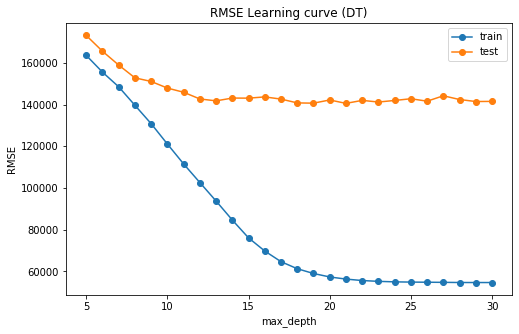

In [126]:
plot_learning_curve(X, y, 'DT', 'max_depth', np.arange(5,31))

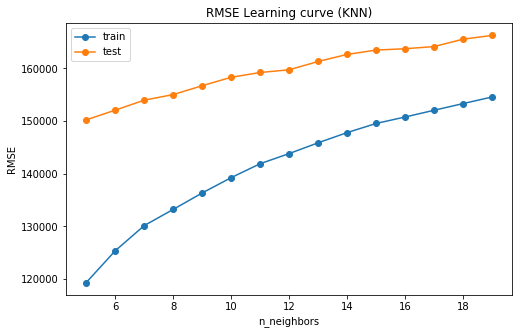

In [127]:
plot_learning_curve(X, y, 'KNN', 'n_neighbors', np.arange(5,20))

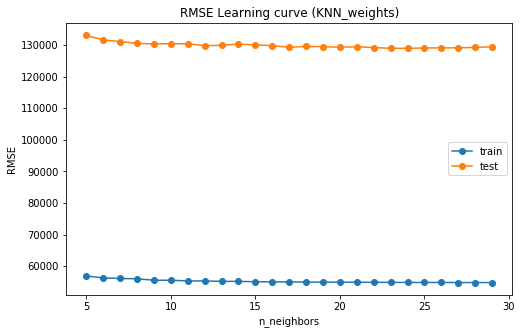

In [128]:
plot_learning_curve(X, y, 'KNN_weights', 'n_neighbors', np.arange(5,30))

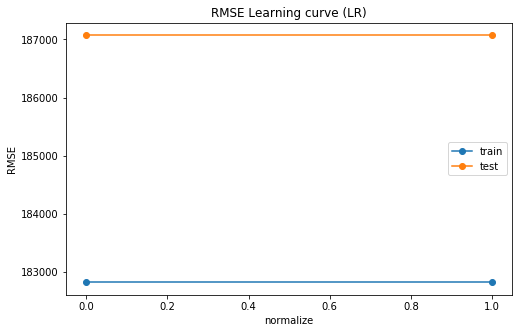

In [129]:
plot_learning_curve(X, y, 'LR', 'normalize', [True, False])

Vemos que en el modelo de vecinos más cercanos existe sobre-ajuste en una gran variedad de valores considerando el peso de la cercanía.

Se seleccionarán los siguientes hiperparámetros:

In [130]:
best_hyperparams = {
    'Regresión lineal': { 'normalize': True },
    'Árbol de Decisión': { 'max_depth': 9 },
    'Vecinos más cercanos': { 'n_neighbors': 14 }
}

Con los valores obtenidos anteriormente, se procede a probar nuevamente los modelos con los nuevos valores para los hiperparámetros.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 182824.05074306316
Raíz del error cuadrático medio en Test: 187069.30574803604



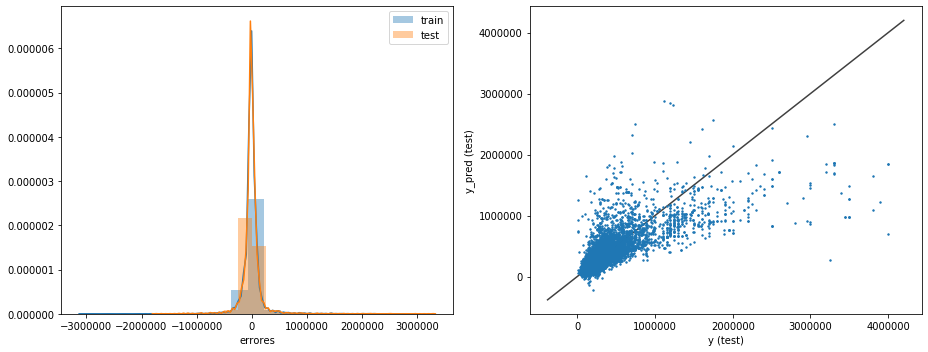

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 130872.0177331587
Raíz del error cuadrático medio en Test: 151127.99994471486



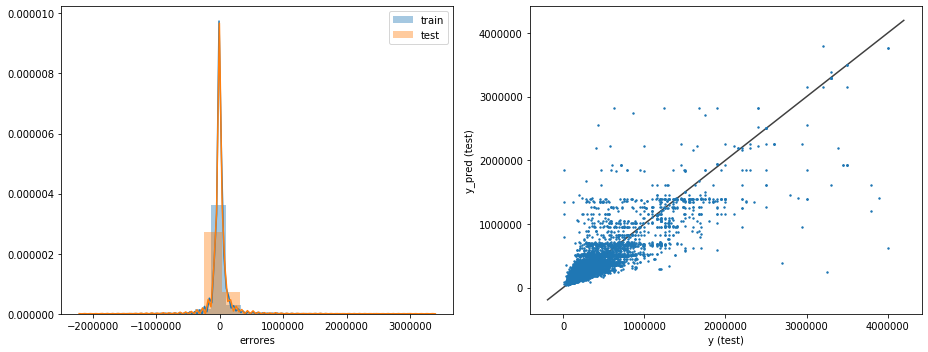

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 147815.49911961702
Raíz del error cuadrático medio en Test: 162655.72243871045



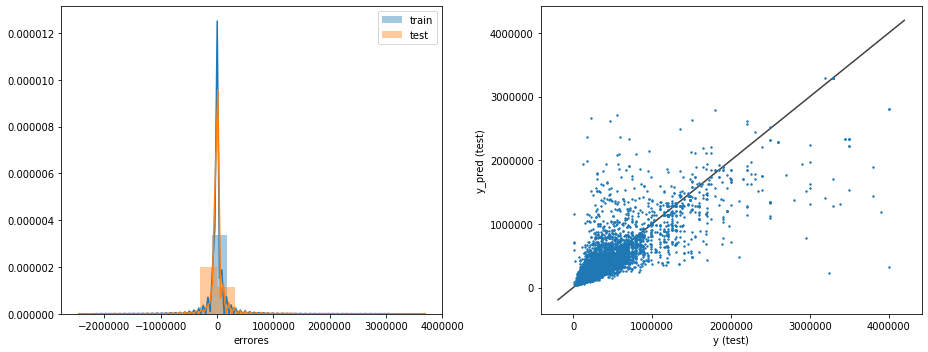

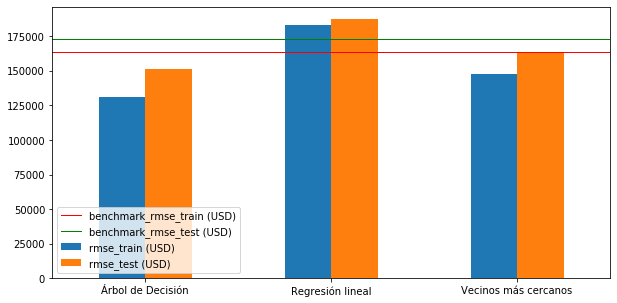

In [131]:
models_info = {
    'Regresión lineal': LinearRegression(**best_hyperparams['Regresión lineal']),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42, **best_hyperparams['Árbol de Decisión']),
    'Vecinos más cercanos': KNeighborsRegressor(**best_hyperparams['Vecinos más cercanos'])
}

ml_process.study_dataset(X, y, models_info, metric='rmse', plot_residuals=True, plot_error_metrics=True)

Podemos ver que existen diferencias importantes entre los valores predichos y los reales. Por esto, se incluirán a continuación en el modelo, predictores no considerados en los entrenamientos anteriores.

Guardamos los errores del último DT como nuevo benchmark.

In [132]:
ml_process.set_benchmark('Árbol de Decisión')

benchmark_rmse_train (USD)    130872.017733
benchmark_rmse_test (USD)     151127.999945
Name: Árbol de Decisión, dtype: float64


### Incluyendo l3
Se agregará, como predictor, la columna de zona (l3). Dado que es una variable categórica, se usarán las clases LabelEncoder y OneHotEncoder para poder hacer uso de esta en los modelos.

Se empezará aplicando nuevamente los filtros pero agregando la columna l3.

In [133]:
filters = {
    'reset_data': True,
    'fixed_values': {
        'property_type': ['Departamento', 'PH', 'Casa'],
        'l2': ['Capital Federal']
    },
    'columns': ['l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'],
    'max_surface_total' : 1000,
    'min_surface_total' : 15,
    'drop_invalid': True,
    'drop_missing': True,
    'max_price' : 4000000
}
data_handler.filter_data(**filters)
dataset = data_handler.processed_data.copy()

Se procede a tratar la variable categórica l3:

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 164913.85966715566
Raíz del error cuadrático medio en Test: 170070.26706972258



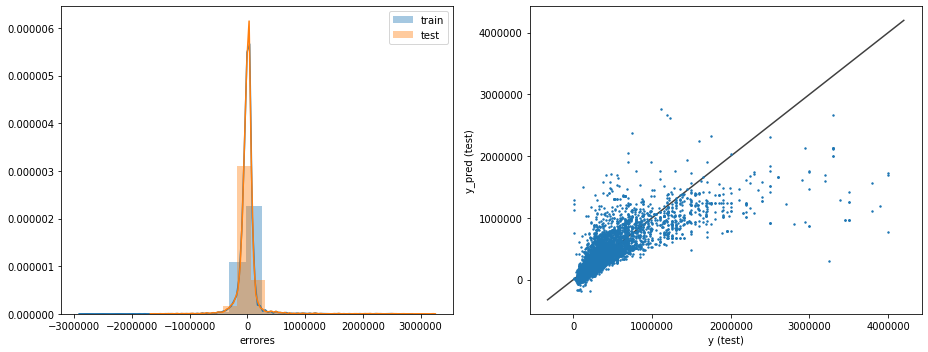

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 101992.6414051563
Raíz del error cuadrático medio en Test: 124329.89761930636



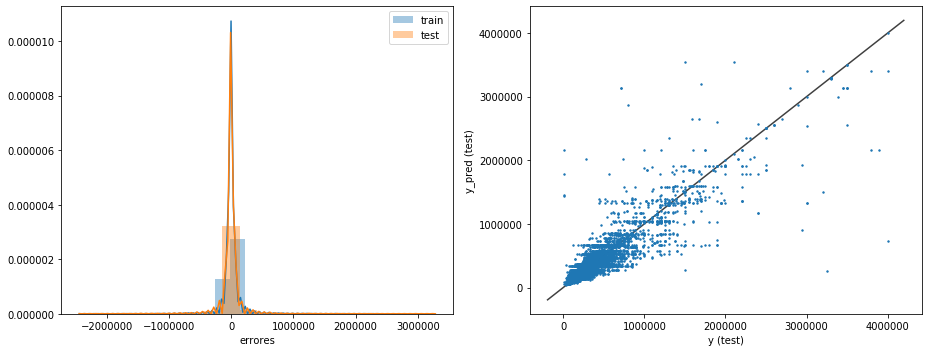

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 144704.11987722424
Raíz del error cuadrático medio en Test: 159678.0386147623



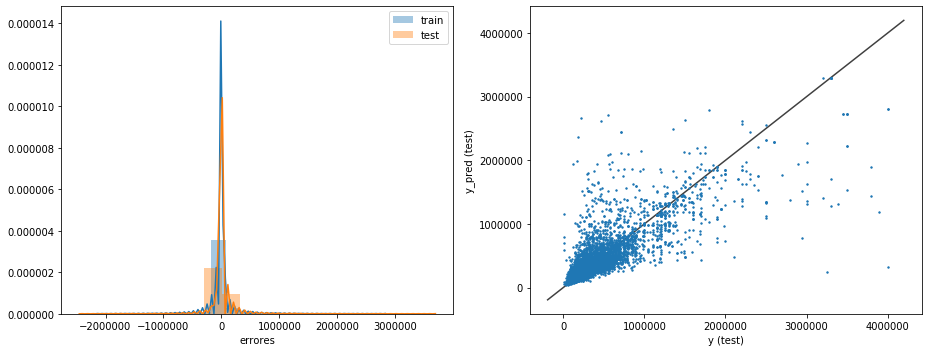

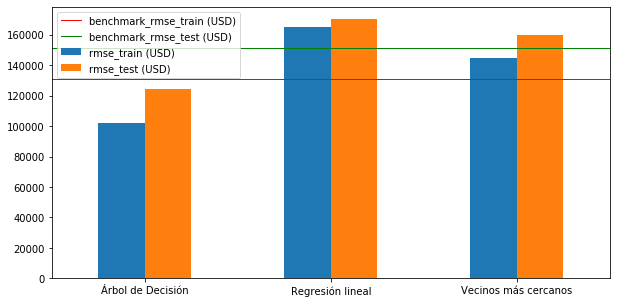

In [134]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
dataset.l3 = labelencoder.fit_transform(dataset.l3)

onehotencoder = OneHotEncoder(drop='first')
l3_encoded = onehotencoder.fit_transform(np.array(dataset.l3).reshape(-1,1)).toarray()

X = pd.DataFrame(np.c_[l3_encoded, dataset.drop(['l3'], axis=1).to_numpy()]).iloc[:,:-1]
y = pd.DataFrame(np.c_[l3_encoded, dataset.drop(['l3'], axis=1).to_numpy()]).iloc[:,-1]

models_info = {
    'Regresión lineal': LinearRegression(**best_hyperparams['Regresión lineal']),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42, **best_hyperparams['Árbol de Decisión']),
    'Vecinos más cercanos': KNeighborsRegressor(**best_hyperparams['Vecinos más cercanos'])
}

ml_process.study_dataset(X, y, models_info, metric='rmse', plot_residuals=True, plot_error_metrics=True)

Agregando l3, se continúa mejorando el desempeño de los modelos. Nuevamente se coloca el árbol de decisión como nuevo benchmark.

In [135]:
ml_process.set_benchmark('Árbol de Decisión')

benchmark_rmse_train (USD)    101992.641405
benchmark_rmse_test (USD)     124329.897619
Name: Árbol de Decisión, dtype: float64


**Usando latitud y longitud en lugar de l3**

Dado que longitud y latitud contienen de forma implícita la información de l3, se hará un análisis agregando estas dos columnas al conjunto de datos de estudio para comparar el cambio en el desempeño de los nuveos predictores:

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 173726.20204390935
Raíz del error cuadrático medio en Test: 165003.84589907757



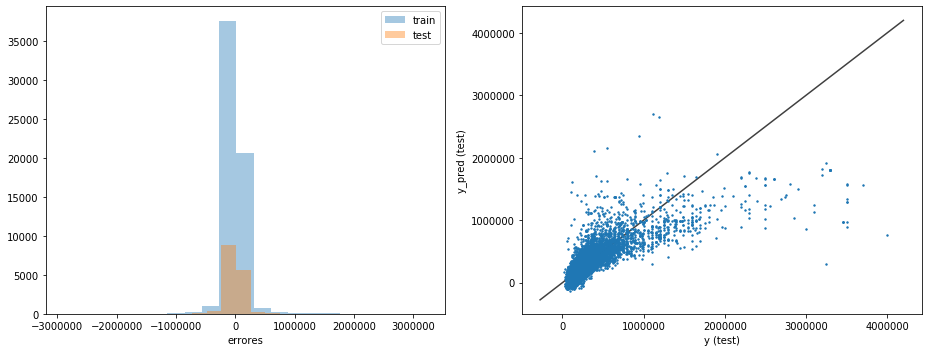

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 88888.53314931282
Raíz del error cuadrático medio en Test: 109900.97662914345



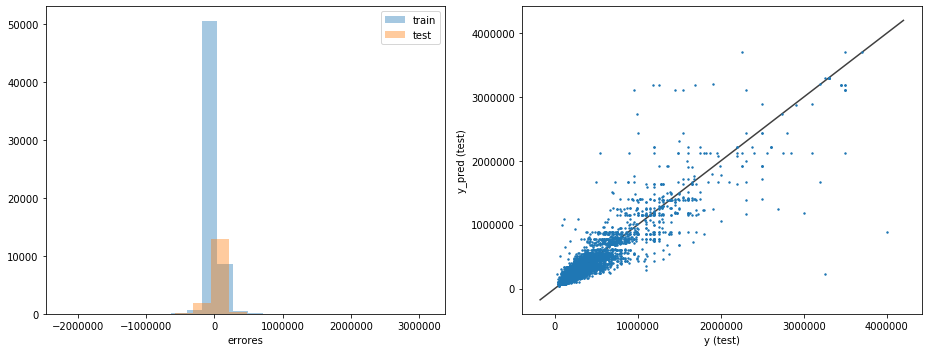

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 143275.9443444206
Raíz del error cuadrático medio en Test: 146338.18148690986



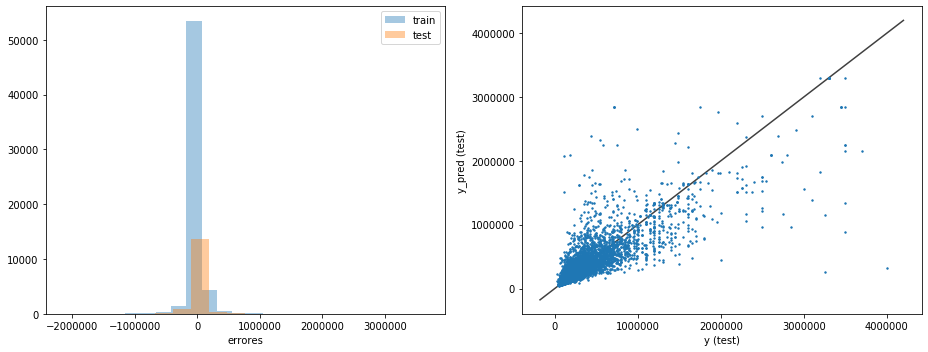

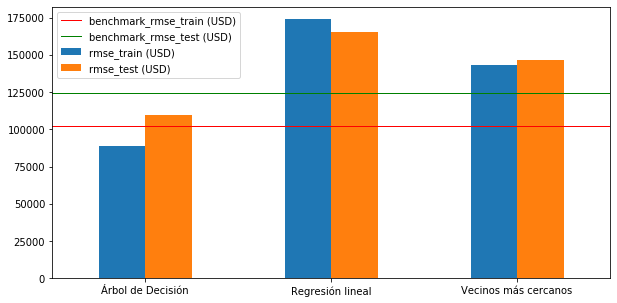

In [136]:
filters = {
    'reset_data': True,
    'fixed_values': {
        'property_type': ['Departamento', 'PH', 'Casa'],
        'l2': ['Capital Federal']
    },
    'columns': ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'],
    'max_surface_total' : 1000,
    'min_surface_total' : 15,
    'max_lat': 60,
    'drop_invalid': True,
    'drop_missing': True,
    'max_price' : 4000000
}
data_handler.filter_data(**filters)
dataset = data_handler.processed_data.copy()

X = dataset.drop(['price'], axis=1)
y = dataset.price

models_info = {
    'Regresión lineal': LinearRegression(**best_hyperparams['Regresión lineal']),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42, **best_hyperparams['Árbol de Decisión']),
    'Vecinos más cercanos': KNeighborsRegressor(**best_hyperparams['Vecinos más cercanos'])
}

ml_process.study_dataset(X, y, models_info, metric='rmse', plot_residuals=True, kde=False, plot_error_metrics=True)

Las coordenadas de latitud y longitud, contienen mejor información para el modelo. Guardamos los resultados de los errores del árbol de decisión:

In [137]:
ml_process.set_benchmark('Árbol de Decisión')

benchmark_rmse_train (USD)     88888.533149
benchmark_rmse_test (USD)     109900.976629
Name: Árbol de Decisión, dtype: float64


### Incluyendo tipos de propiedad

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 168761.7085920736
Raíz del error cuadrático medio en Test: 160418.31417336437



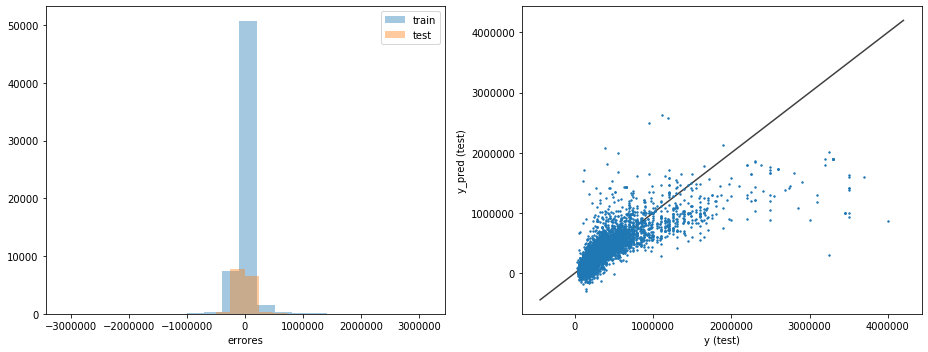

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 83825.31841578781
Raíz del error cuadrático medio en Test: 108099.76472677798



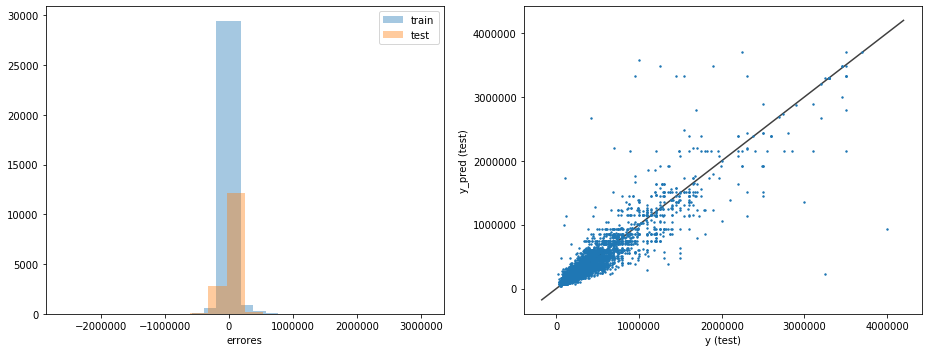

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 142499.09791787792
Raíz del error cuadrático medio en Test: 145379.5262853723



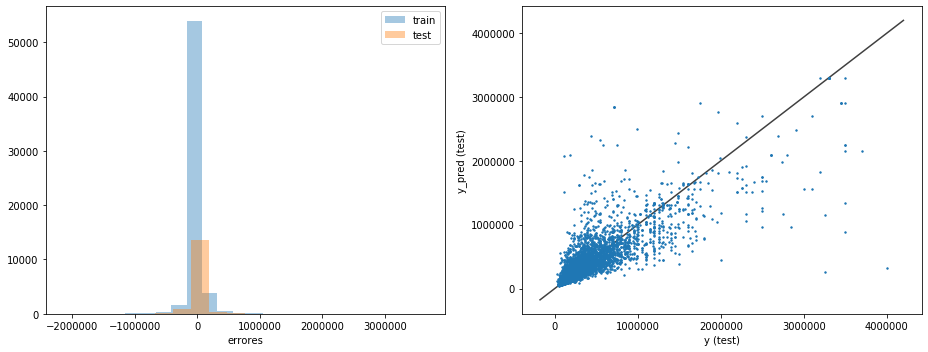

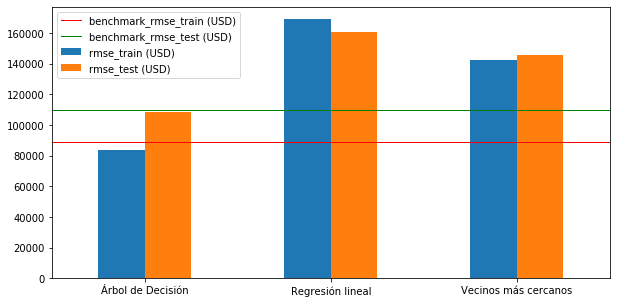

In [138]:
filters = {
    'reset_data': True,
    'fixed_values': {
        'property_type': ['Departamento', 'PH', 'Casa'],
        'l2': ['Capital Federal']
    },
    'columns': ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'property_type', 'price'],
    'max_surface_total' : 1000,
    'min_surface_total' : 15,
    'max_lat': 60,
    'drop_invalid': True,
    'drop_missing': True,
    'max_price' : 4000000
}
data_handler.filter_data(**filters)
dataset = data_handler.processed_data.copy()

labelencoder = LabelEncoder()
dataset.property_type = labelencoder.fit_transform(dataset.property_type)
property_type_dummies = pd.get_dummies(dataset.property_type)
property_type_dummies.columns = labelencoder.classes_

dataset['Departamento'] = property_type_dummies['Departamento']
dataset['PH'] = property_type_dummies['PH']
dataset['Casa'] = property_type_dummies['Casa']

dataset.drop(['property_type'], axis=1, inplace=True)

X = dataset.drop(['price'], axis=1)
y = dataset.price

models_info = {
    'Regresión lineal': LinearRegression(**best_hyperparams['Regresión lineal']),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42, **best_hyperparams['Árbol de Decisión']),
    'Vecinos más cercanos': KNeighborsRegressor(**best_hyperparams['Vecinos más cercanos'])
}

ml_process.study_dataset(X, y, models_info, metric='rmse', plot_residuals=True, kde=False, plot_error_metrics=True)

In [139]:
ml_process.set_benchmark('Árbol de Decisión')

benchmark_rmse_train (USD)     83825.318416
benchmark_rmse_test (USD)     108099.764727
Name: Árbol de Decisión, dtype: float64


**Sólo a modo de referencia**: Se revisarán los coeficientes para la regresión lineal para visualizar la coherencia de los resultados obtenidos al igual que los del árbol de decisión.

In [140]:
ml_process.linear_coef

,predictors,coefficients
0,lat,1.419108e+06
1,lon,5.835319e+05
2,rooms,-8.990308e+03
3,bedrooms,-5.362812e+04
4,bathrooms,7.346881e+04
5,surface_total,4.180674e+02
6,surface_covered,3.354636e+03
7,Departamento,-1.851628e+18
8,PH,-1.851628e+18
9,Casa,-1.851628e+18


In [141]:
ml_process.dt_feature_importances

,predictors,feature_importances
0,lat,0.077258
1,lon,0.115480
2,rooms,0.012802
3,bedrooms,0.001514
4,bathrooms,0.007593
5,surface_total,0.054764
6,surface_covered,0.637873
7,Departamento,0.092335
8,PH,0.000264
9,Casa,0.000117


Se puede notar lo siguiente:
* En la regresión lineal:
    * A mayor cantidad de dormitorios y ambientes, menor el precio. Esto no parece corresponder a la realidad y puede deberse al hecho que las variables rooms, bedrooms y bathrooms presentan correlaciones elevadas.
    * Los coeficientes para los tipos de propiedad son negativos. Esto se debe a colinearidad como en el punto anterior. Sin embargo, dado que este modelo se estudia a modo de referencia por su interpretabilidad, se decidió usar con estas variables.
* En el árbol de decisión, vemos que la superficie cubierta es más importante que la total y los ambientes (conectando con el punto anterior) tiene mayor peso que los dormitorios y baños.

Considerando lo encontrado, a continuación se probarán varias combinaciones de los predictores para mantener la cantidad de información relevante en el modelo y luego se medirá el efecto sobre los resultados.

### Sustitución de superficie cubierta y total por su cociente

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 213083.63279735408
Raíz del error cuadrático medio en Test: 203085.6451608719

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 122291.26828476241
Raíz del error cuadrático medio en Test: 139815.98560813905

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 144985.21931737708
Raíz del error cuadrático medio en Test: 151685.1861622216



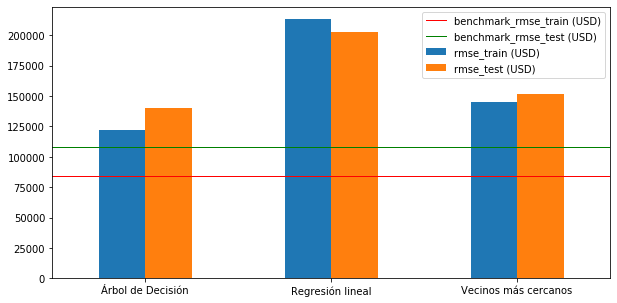

In [142]:
dataset_surface_ratio = dataset.copy()
dataset_surface_ratio['surface_ratio'] = dataset_surface_ratio.surface_covered / dataset_surface_ratio.surface_total
dataset_surface_ratio = dataset_surface_ratio.drop(['surface_covered', 'surface_total'], axis=1)

X = dataset_surface_ratio.drop(['price'], axis=1)
y = dataset_surface_ratio.price

models_info = {
    'Regresión lineal': LinearRegression(**best_hyperparams['Regresión lineal']),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42, **best_hyperparams['Árbol de Decisión']),
    'Vecinos más cercanos': KNeighborsRegressor(**best_hyperparams['Vecinos más cercanos'])
}

ml_process.study_dataset(X, y, models_info, metric='rmse', plot_residuals=False, plot_error_metrics=True)

Sin efectos deseados, se continuará con otras combinaciones.

### Sustitución de dormitorios y ambientes y superficies cubierta y total por sus cocientes

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 214304.15108387318
Raíz del error cuadrático medio en Test: 224258.39942322034

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 125839.38382360291
Raíz del error cuadrático medio en Test: 154370.63481973804

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 147233.91244810328
Raíz del error cuadrático medio en Test: 161548.3826086284



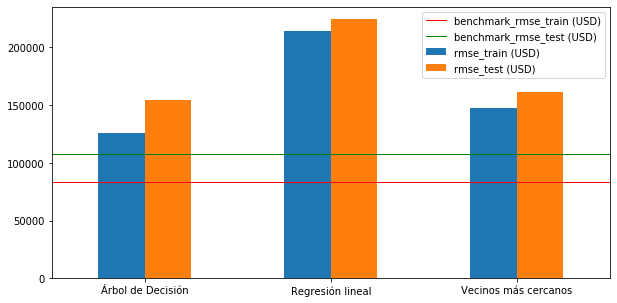

In [143]:
dataset_ratio = dataset.copy()

dataset_ratio = dataset_ratio[dataset_ratio.bedrooms != 0]
dataset_ratio['bath_bed_ratio'] = dataset_ratio.bedrooms / dataset_ratio.rooms
dataset_ratio = dataset_ratio.drop(['bedrooms', 'rooms'], axis=1)

dataset_ratio['surface_ratio'] = dataset_ratio.surface_covered / dataset_ratio.surface_total
dataset_ratio = dataset_ratio.drop(['surface_total', 'surface_covered'], axis=1)

dataset_ratio.head()

X = dataset_ratio.drop(['price'], axis=1)
y = dataset_ratio.price

models_info = {
    'Regresión lineal': LinearRegression(**best_hyperparams['Regresión lineal']),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42, **best_hyperparams['Árbol de Decisión']),
    'Vecinos más cercanos': KNeighborsRegressor(**best_hyperparams['Vecinos más cercanos'])
}

ml_process.study_dataset(X, y, models_info, metric='rmse', plot_residuals=False, plot_error_metrics=True)

Se descarta esta posibilidad. Se continúa con una combinación adicional:

### Sustitución de baños y dormitorios por su cociente y remover la superficie total y ambientes

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 170163.2410571292
Raíz del error cuadrático medio en Test: 180543.66592106264



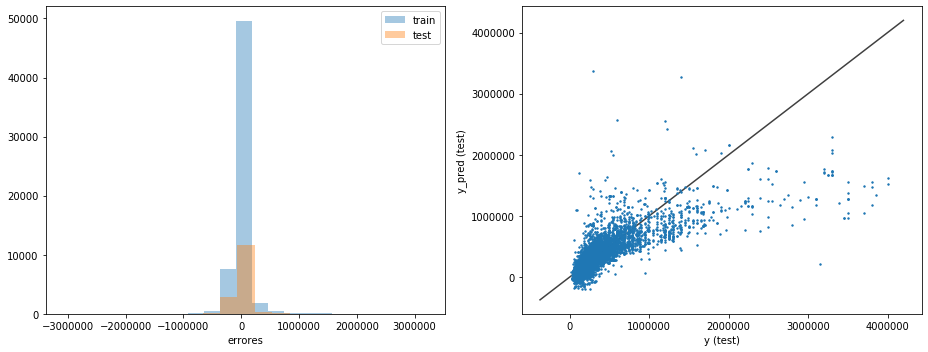

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 88256.29693872684
Raíz del error cuadrático medio en Test: 103316.57084382078



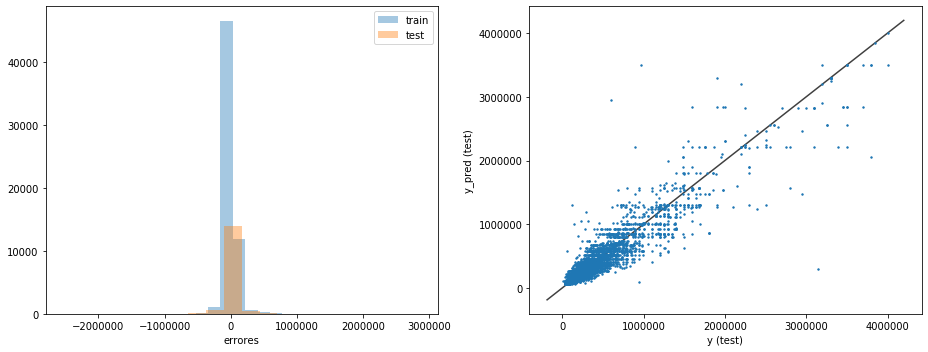

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 124646.26497048781
Raíz del error cuadrático medio en Test: 148883.92967930518



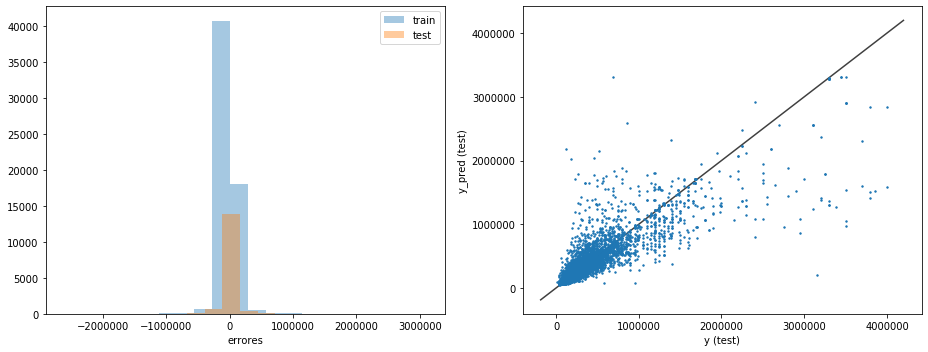

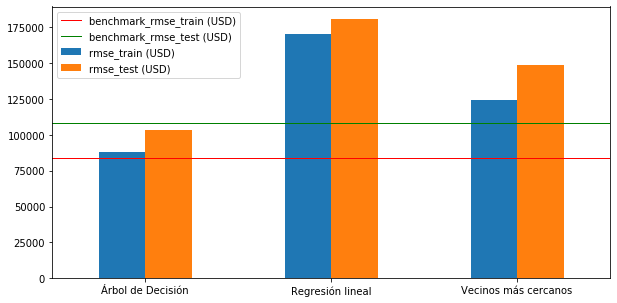

In [144]:
dataset_ratio = dataset.copy()

dataset_ratio = dataset_ratio[dataset_ratio.bedrooms != 0]
dataset_ratio['bath_bed_ratio'] = dataset_ratio.bathrooms / dataset_ratio.bedrooms
dataset_ratio = dataset_ratio.drop(['bedrooms', 'bathrooms'], axis=1)

dataset_ratio = dataset_ratio.drop(['surface_total', 'rooms'], axis=1)

dataset_ratio.head()

X = dataset_ratio.drop(['price'], axis=1)
y = dataset_ratio.price

models_info = {
    'Regresión lineal': LinearRegression(**best_hyperparams['Regresión lineal']),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42, **best_hyperparams['Árbol de Decisión']),
    'Vecinos más cercanos': KNeighborsRegressor(**best_hyperparams['Vecinos más cercanos'])
}

ml_process.study_dataset(X, y, models_info, metric='rmse', plot_residuals=True, kde=False, plot_error_metrics=True)

Para este caso, con el árbol de decisión se logra reducir un poco el sobre-ajuste. Se revisan nuevamente los coeficientes para comparar con el comportamiento en la realidad.

In [145]:
ml_process.linear_coef

,predictors,coefficients
0,lat,1.453557e+06
1,lon,5.298058e+05
2,surface_covered,3.774963e+03
3,Departamento,-7.213530e+17
4,PH,-7.213530e+17
5,Casa,-7.213530e+17
6,bath_bed_ratio,1.099765e+05


In [146]:
ml_process.dt_feature_importances

,predictors,feature_importances
0,lat,0.079086
1,lon,0.102268
2,surface_covered,0.684568
3,Departamento,0.101390
4,PH,0.000215
5,Casa,0.000584
6,bath_bed_ratio,0.031888


Vemos en la regresión lineal (sólo referencia) que:
* A mayor latitud (más al norte), mayor el precio.
* A mayor longitud (más al este), mayor el precio.
* El aumento del precio es mayor siendo de zona norte que de zona este.
* Un aumento en la superficie cubierta implica mayor precio.
* El precio es mayor cuando la cantidad de baños iguala a la de dormitorios.
* Los valores de coeficientes en el tipo de propiedad puede deberse a colinearidad entre estos atributos. Se decidió dejarlos ya que este modelo es sólo de referencia. Los otros modelos si pueden hacer uso de ello.

En el árbol de decisión (modelo seleccionado):
* En las importancias, no existen ahora predictores con menos de 8% de importancia (salvo PH).
* Prevalece primero la superficie cubierta.
* Los predictores PH y Casa tienen una importancia menor al 0.1%. Se pueden descartar y revisar el impacto en el modelo.

Ajustando el nuevo benchmark:

In [147]:
ml_process.set_benchmark('Árbol de Decisión')

benchmark_rmse_train (USD)     88256.296939
benchmark_rmse_test (USD)     103316.570844
Name: Árbol de Decisión, dtype: float64


Elimando PH y Casa y realizando nuevamente el estudio:

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 172085.46227742857
Raíz del error cuadrático medio en Test: 182602.23179797363



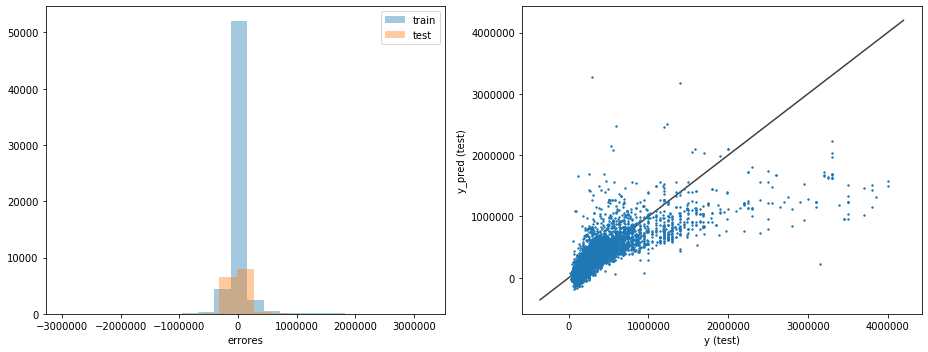

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 88274.0169560616
Raíz del error cuadrático medio en Test: 101609.9322862421



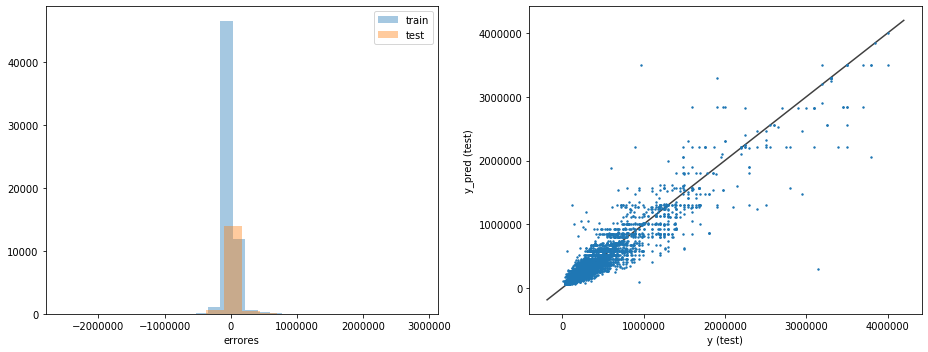

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 124203.80669085668
Raíz del error cuadrático medio en Test: 148570.1130973449



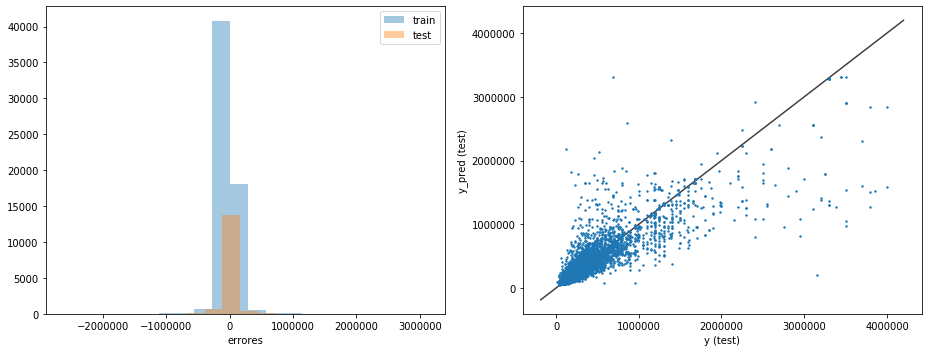

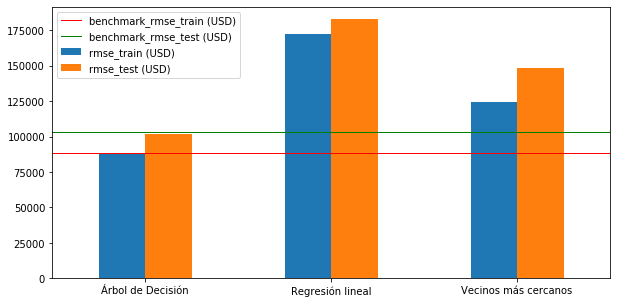

In [148]:
X = dataset_ratio.drop(['price', 'PH', 'Casa'], axis=1)
y = dataset_ratio.price

models_info = {
    'Regresión lineal': LinearRegression(**best_hyperparams['Regresión lineal']),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42, **best_hyperparams['Árbol de Decisión']),
    'Vecinos más cercanos': KNeighborsRegressor(**best_hyperparams['Vecinos más cercanos'])
}

ml_process.study_dataset(X, y, models_info, metric='rmse', plot_residuals=True, kde=False, plot_error_metrics=True)

Se mejora levemente el error en los datos de prueba por lo que se redujo el sobre-ajuste.

A continuación se revisarán los valores de los errores con la métrica MAE:

Modelo: Regresión lineal
Error absoluto medio en Train: 46443.828389048576
Error absoluto medio en Test: 46653.93872220814



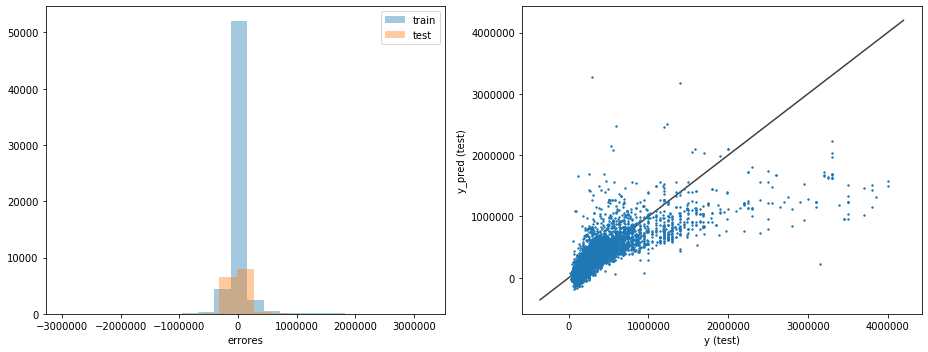

Modelo: Árbol de Decisión
Error absoluto medio en Train: 25110.641975308652
Error absoluto medio en Test: 25533.780219780223



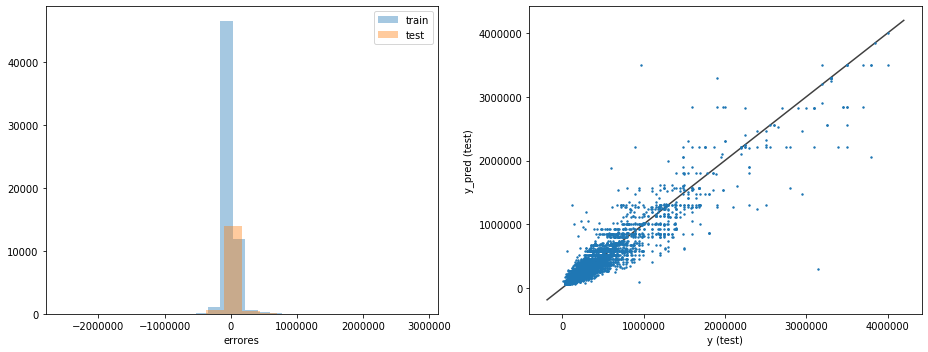

Modelo: Vecinos más cercanos
Error absoluto medio en Train: 16642.85714285713
Error absoluto medio en Test: 17592.857142857145



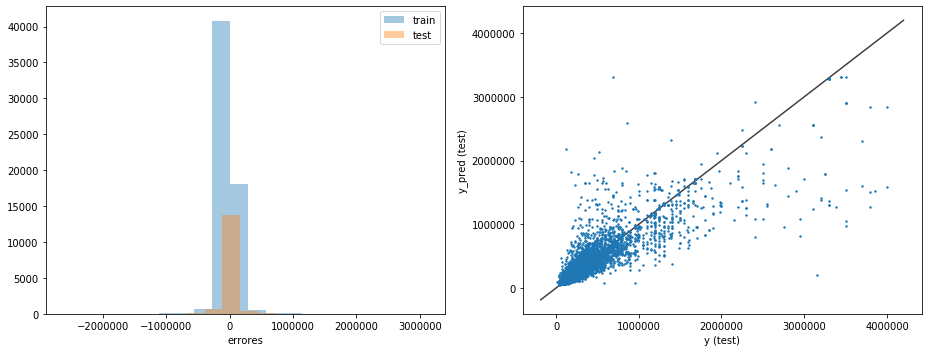

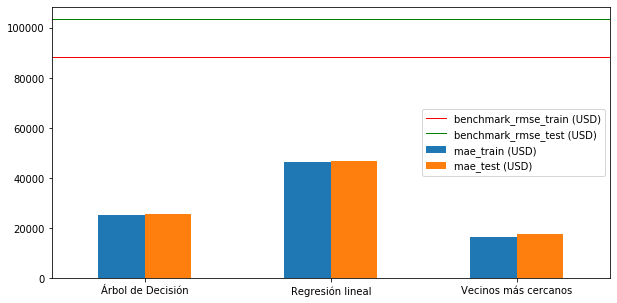

In [149]:
models_info = {
    'Regresión lineal': LinearRegression(**best_hyperparams['Regresión lineal']),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42, **best_hyperparams['Árbol de Decisión']),
    'Vecinos más cercanos': KNeighborsRegressor(**best_hyperparams['Vecinos más cercanos'])
}

ml_process.study_dataset(X, y, models_info, metric='mae', plot_residuals=True, kde=False, plot_error_metrics=True)

Por el desempeño que muestran los modelos y el comportamiento de los vecinos más cercanos con la métrica RMSE, se tomará el árbol de decisión como "mejor modelo" (posteriormente se explicará por qué se coloca entre comillas).

Dado que los predictores cambiaron durante el proceso, no se puede asegurar que los hiper parámetros seleccionados como "mejores", lo sigan siendo aún. Se verificará nuevamente graficando las curvas de aprendizaje.

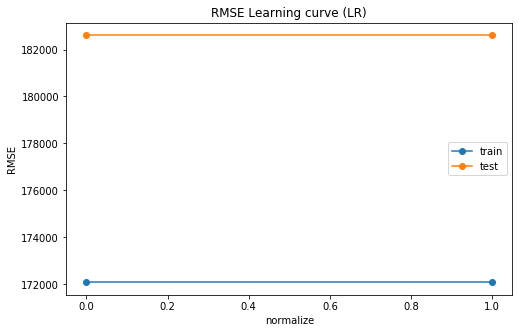

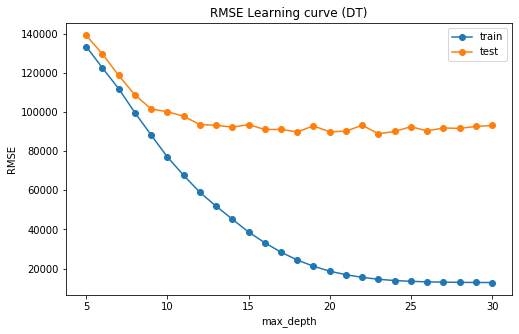

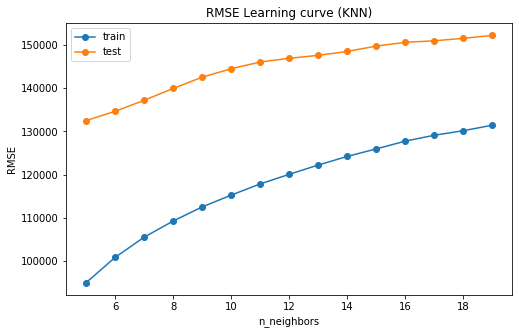

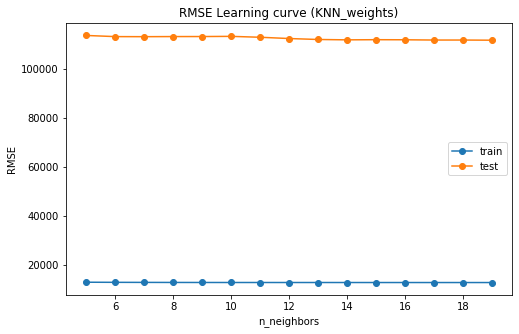

In [150]:
plot_learning_curve(X, y, 'LR', 'normalize', [True, False])
plot_learning_curve(X, y, 'DT', 'max_depth', np.arange(5,31))
plot_learning_curve(X, y, 'KNN', 'n_neighbors', np.arange(5,20))
plot_learning_curve(X, y, 'KNN_weights', 'n_neighbors', np.arange(5,20))

Vemos que las formas se siguen manteniento aunque con valores de RMSE más bajos.

### Conclusiones y próximos pasos

* El mejor modelo que se obtuvo fue el árbol de decisión con profundidad 9 con los predictores: ubicación (latitud y longitud), superficie cubierta, si se trata de un departamento o no y la relación baños-habitaciones.
* Que en el modelo de árbol de decisión se evidenciara la poca importancia de saber si es un PH o una Casa, puede indicarnos que con los datos que se disponen, el predictor de inmuebles es más un predictor de departamentos. El resto de los tipos de propiedades las considera iguales.
* Crear nuevos predictores que contuvieran la misma información y reducir el número de los mismos no sólo mejoró el desempeño sino que también se eliminó la colinearidad de los atributos (visto en los mapas de calor de correlaciones).
* La comparación de los valores de error con ambas métricas sugiere entre otras cosas:
    * Faltan atributos importantes para hacer una correcta predicción, por ejemplo si:
        * La residencia cuenta con garaje propio.
        * Tiene piscina.
        * Tiene calefacción centralizada (en caso de edificios).
        * Tiene centros comerciales o supermercados cercanos.
        * Tiene línea de Subte cerca.
    * Los comportamientos de los tres tipos de inmuebles son diferentes, por lo que podría ser pertinente hacer un modelo para cada tipo de propiedad (se evidencia en los heatmaps con las relaciones por tipos de propiedad).
    * Separar los modelos por rango de precios, los principios que rigen el precio de inmuebles pueden tener diferencias significativas por ejemplo para inmuebles de gama alta (mayor a). En los gráficos de predicción vs real, se evidenciaba que estos eran los que tenian mayores errores (superiores a 1.000.000USD).
    * Usar predictores diferentes para cada uno de los modelos.
    * Usar técnicas de preprocesamiento más avanzadas (ejemplo: escalar los valores).
    * Usar técnicas más avanzadas de ingeniería de atributos como imputación de valores.
* El modelo seleccionado puede considerarse una respuesta "parcial" a la pregunta del problema. Se dice "parcial" dado que el error obtenido en el RMSE es cercano a la mitad del precio del inmueble promedio. Los valores de errores con el MAE nos dan indicios que se puede mejorar los resultados tomando las medidas adicionales adecuadas. Por ello, se recomienda hacer estudios adicionales antes de dar la respuesta "definitiva".